In [6]:
import nltk
from nltk.corpus.reader import CHILDESCorpusReader
import numpy as np
import pandas as pd
from nltk.probability import FreqDist
corpus = nltk.data.find('/Users/Ershui13/Desktop/TP_BU/')
Adam = CHILDESCorpusReader(corpus, 'Adam/.*.xml')
Eve = CHILDESCorpusReader(corpus, 'Eve/.*.xml')
Fraser = CHILDESCorpusReader(corpus, 'Fraser/.*.xml')
Sarah = CHILDESCorpusReader(corpus, 'Sarah/.*.xml')
Peter = CHILDESCorpusReader(corpus, 'Peter/.*.xml')
Naomi = CHILDESCorpusReader(corpus, 'Naomi/.*.xml')
Allison = CHILDESCorpusReader(corpus, 'Allison/.*.xml')
April = CHILDESCorpusReader(corpus, 'April/.*.xml')

KeyboardInterrupt: 

In [2]:
#import nltk
#from nltk.corpus.reader import CHILDESCorpusReader
import numpy as np
import pandas as pd
from nltk.probability import FreqDist
from pandas import DataFrame

from nltk.stem.wordnet import WordNetLemmatizer

import matplotlib.pyplot as plt
from scipy import stats
import itertools

from scipy import optimize
import seaborn as sns
import matplotlib.pyplot as plt

import powerlaw

In [326]:
def df(child):
    data = DataFrame(FreqDist(child).most_common())
    data.columns = ['verb','count']
    data['rank'] = list(range(1,len(data)+1))
    return data
def histo(data,name):
    data[0:50].plot(x = 'verb', y = 'count',kind='bar',figsize = (15,10), legend = True,color="black")
    plt.rcParams.update({'font.size': 12})
    plt.savefig('{}.png'.format(name))
    plt.show()
    
def get_rank(vl,n):
    kdf = df(vl)
    kwords = [i[0] for i in kdf['verb'].values.tolist()]
    k_converb =[]
    for wk in kwords:
        k_converb.append(WordNetLemmatizer().lemmatize(wk,'v'))
    kdf['converb'] = k_converb
    kdf2 = kdf.groupby(['converb']).agg('sum')
    kdf = kdf2.sort_values('count', inplace = False, ascending=False)
    kdf.to_csv('{}.csv'.format(n))
    dfk = pd.read_csv('{}.csv'.format(n), sep = ',')
    dfk.colums = ['verb', 'count', 'rank']
    dfk = dfk.rename(columns = {"converb":"verb"})
    dfk = dfk.drop(columns = ['rank'])
    return dfk

def get_mot_rank(vl,n):
    kdf = df(vl)
    kwords = [i[0] for i in kdf['verb'].values.tolist()]
    k_converb =[]
    for wk in kwords:
        k_converb.append(WordNetLemmatizer().lemmatize(wk,'v'))
    kdf['converb'] = k_converb
    kdf2 = kdf.groupby(['converb']).agg('sum')
    kdf = kdf2.sort_values('count', inplace = False, ascending=False)
    kdf.to_csv('{}_mot.csv'.format(n))
    dfk = pd.read_csv('{}_mot.csv'.format(n), sep = ',')
    dfk.colums = ['verb', 'count', 'rank']
    dfk = dfk.rename(columns = {"converb":"verb"})
    dfk = dfk.drop(columns = ['rank'])
    return dfk

def table1(child):
    words = child.tagged_words(speaker = ['CHI'])
    sents = child.sents(speaker = ['CHI'])
    return(len(words), len(sents))

def irrverb(i,k,w):
    dfkk = get_rank(i,k)
    dfkk_mot = get_mot_rank(w,k)
    kkir = dfkk.loc[dfkk['verb'].isin (irrr)]
    kkir.to_csv('{}ir.csv'.format(k))
    kk_motir = dfkk_mot.loc[dfkk_mot['verb'].isin (irrr)]
    kk_motir.to_csv('{}irmot.csv'.format(k))
    UP = len(dfkk_mot)
    dfkk_mot['rank'] = list(range(1,len(dfkk_mot)+1))
    k_a_p = Powerlawfit(dfkk_mot).plf()[0]
    UC = len(dfkk)
    dfkk['rank'] = list(range(1,len(dfkk)+1))
    kkir['rank'] = list(range(1,len(kkir)+1))
    kk_motir['rank'] = list(range(1,len(kk_motir)+1))
    k_a_c = Powerlawfit(dfkk).plf()[0]
    ep = len(kk_motir)
    ec = len(kkir)
    k_b_c = Powerlawfit(kkir).plf()[0]
    k_b_p = Powerlawfit(kk_motir).plf()[0]
    print (k, 'Up:', float(str(round(UP, 2))), 'ap:', float(str(round(k_a_p, 2))), 'Uc:', float(str(round(UC,2))), 
           'ac:',float(str(round(k_a_c, 2))), 'ep:', float(str(round(ep, 2))), 
           'bp:',float(str(round(k_b_p, 2))),'ec:',float(str(round(ec, 2))),'bc:',float(str(round(k_b_c, 2))) )


def irrverb(i,k,w):
    dfkk = get_rank(i,k)
    dfkk_mot = get_mot_rank(w,k)
    kkir = dfkk.loc[dfkk['verb'].isin (irrr)]
    kkir.to_csv('{}ir.csv'.format(k))
    kk_motir = dfkk_mot.loc[dfkk_mot['verb'].isin (irrr)]
    kk_motir.to_csv('{}irmot.csv'.format(k))
    UP = len(dfkk_mot)
    dfkk_mot['rank'] = list(range(1,len(dfkk_mot)+1))
    k_a_p = Powerlawfit(dfkk_mot).plf()[0]
    UC = len(dfkk)
    dfkk['rank'] = list(range(1,len(dfkk)+1))
    kkir['rank'] = list(range(1,len(kkir)+1))
    kk_motir['rank'] = list(range(1,len(kk_motir)+1))
    k_a_c = Powerlawfit(dfkk).plf()[0]
    ep = len(kk_motir)
    ec = len(kkir)
    k_b_c = Powerlawfit(kkir).plf()[0]
    k_b_p = Powerlawfit(kk_motir).plf()[0]
    print (k, 'Up:', float(str(round(UP, 2))), 'ap:', float(str(round(k_a_p, 2))), 'Uc:', float(str(round(UC,2))), 
           'ac:',float(str(round(k_a_c, 2))), 'ep:', float(str(round(ep, 2))), 
           'bp:',float(str(round(k_b_p, 2))),'ec:',float(str(round(ec, 2))),'bc:',float(str(round(k_b_c, 2))) )    
    


class Powerlawfit:
    def __init__(self, data):
        self.data = data
    def x(self):
        xdata = self.data['rank']
        return xdata
    def y(self):
        ydata = self.data['count']
        return ydata
    def plf(self):
        powerlaw = lambda x, amp, s: amp/(x**(s))
        ydata = self.data['count']
        xdata = list(range(1,len(ydata)+1))
        logx = np.log10(xdata)
        logy = np.log10(ydata)
        fitfunc = lambda p, x: p[0] - p[1]*x
        errfunc = lambda p, x, y: y-fitfunc(p,x)
        pinit =[-1,1]
        out = optimize.leastsq(errfunc, pinit, args=(logx, logy), full_output=1)
        pfinal = out[0]
        s = pfinal[1]
        amp = 10.0**pfinal[0]
        return s,amp

class Powerlawfit:
    def __init__(self, data):
        self.data = data
    def x(self):
        xdata = self.data['rank']
        return xdata
    def y(self):
        ydata = self.data['count']
        return ydata
    def yerr(self):
        ydata = self.data['count']
        yerr = 0.2*ydata
        return yerr
    def plf(self):
        powerlaw = lambda x, amp, s: amp*(x**(-s))
        ydata = self.data['count']
        xdata = self.data['rank']
        yerr = 0.2 * ydata
        logx = np.log10(xdata)
        logy = np.log10(ydata)
        logyerr = yerr / ydata
        fitfunc = lambda p, x: p[0] +  x/p[1]
        errfunc = lambda p, x, y, err: (y-fitfunc(p,x))/err
        pinit = [1.0, -1.0]
        out = optimize.leastsq(errfunc, pinit, args=(logx, logy, logyerr), full_output=1)
        pfinal = out[0]
        covar = out[1]
        s = pfinal[1]
        amp = 10.0**pfinal[0]
        sErr = np.sqrt(covar[1][1])
        ampErr = np.sqrt(covar[0][0]) * amp
        return s,amp

In [239]:
print('Adam:', len(Adam.words(speaker = ['MOT'])))
print('Eve:', len(Eve.words(speaker = ['MOT'])))
print('Sarah:', len(Sarah.words(speaker = ['MOT'])))
print('Peter:', len(Peter.words(speaker = ['MOT','PAT','LOI','FAT'])))
print('Naomi:', len(Naomi.words(speaker = ['MOT'])))
print('Allison:', len(Allison.words(speaker = ['MOT'])))
print('April:', len(April.words(speaker = ['MOT'])))
print('Fraser:', len(Fraser.words(speaker = ['MOT'])))

Adam: 30366
Eve: 11253
Sarah: 27682
Peter: 95180
Naomi: 9634
Allison: 9366
April: 4435
Fraser: 222200


In [70]:
print('Adam:', len(Adam.words(speaker = ['MOT','FAT','URS','RIC','COL', 'PAU'])))

Adam: 36516


In [67]:
print('Adam:', len(Adam.words(speaker = ['CHI'])))

Adam: 39403


In [67]:
Adam_verb = []
Adam_mot_verb=[]
for i in Adam.tagged_words(speaker = ['CHI']):
    if i[1] == 'v' or i[1] == 'part':
        Adam_verb.append(i)
for i in Adam.tagged_words(speaker = ['MOT']):
    if i[1] == 'v' or i[1] == 'part':
        Adam_mot_verb.append(i)
print('Adam mother:', len(Adam_mot_verb))
print('Adam:',len(Adam_verb))

Eve_verb = []
Eve_mot_verb=[]
for i in Eve.tagged_words(speaker = ['CHI']):
    if i[1] == 'v' or i[1] == 'part':
        Eve_verb.append(i)
for i in Eve.tagged_words(speaker = ['MOT']):
    if i[1] == 'v' or i[1] == 'part':
        Eve_mot_verb.append(i)
print('Eve mother:', len(Eve_mot_verb))       
print('Eve:', len(Eve_verb))


Sarah_verb = []
Sarah_mot_verb =[]
for i in Sarah.tagged_words(speaker = ['CHI']):
    if i[1] == 'v' or i[1] == 'part':
        Sarah_verb.append(i)
for i in Sarah.tagged_words(speaker = ['MOT']):
    if i[1] == 'v' or i[1] == 'part':
        Sarah_mot_verb.append(i)
print('Sarah:', len(Sarah_verb))
print('Sarah mother:', len(Sarah_mot_verb))

Peter_verb = []
Peter_mot_verb=[]
for i in Peter.tagged_words(speaker = ['CHI']):
    if i[1] == 'v' or i[1] == 'part':
        Peter_verb.append(i)
for i in Peter.tagged_words(speaker = ['MOT','PAT','LOI','FAT']):
    if i[1] == 'v' or i[1] == 'part':
        Peter_mot_verb.append(i)
print('Peter:', len(Peter_verb))        
print('Peter mother:', len(Peter_mot_verb))

Naomi_verb = []
Naomi_mot_verb =[]
for i in Naomi.tagged_words(speaker = ['CHI']):
    if i[1] == 'v' or i[1] == 'part':
        Naomi_verb.append(i)
for i in Naomi.tagged_words(speaker = ['MOT']):
    if i[1] == 'v' or i[1] == 'part':
        Naomi_mot_verb.append(i)
print('Naomi:', len(Naomi_verb))
print('Naomi mother:', len(Naomi_mot_verb))

Allison_verb = []
Allison_mot_verb =[]
for i in Allison.tagged_words(speaker = ['CHI']):
    if i[1] == 'v' or i[1] == 'part':
        Allison_verb.append(i)
for i in Allison.tagged_words(speaker = ['MOT']):
    if i[1] == 'v' or i[1] == 'part':
        Allison_mot_verb.append(i)
print('Allison:', len(Allison_verb))
print('Allison mother:', len(Allison_mot_verb))

April_verb = []
April_mot_verb =[]
for i in April.tagged_words(speaker = ['CHI']):
    if i[1] == 'v' or i[1] == 'part':
        April_verb.append(i)
for i in April.tagged_words(speaker = ['MOT']):
    if i[1] == 'v' or i[1] == 'part':
        April_mot_verb.append(i)
print('April:', len(April_verb))
print('April mother:', len(April_mot_verb))

Fraser_verb = []
Fraser_mot_verb = []
for i in Fraser.tagged_words(speaker = ['CHI']):
    if i[1] == 'v' or i[1] == 'part':
        Fraser_verb.append(i)
for i in Fraser.tagged_words(speaker = ['MOT']):
    if i[1] == 'v' or i[1] == 'part':
        Fraser_mot_verb.append(i) 
print('Fraser:', len(Fraser_verb))
print('Fraser mother:', len(Fraser_mot_verb))

Adam mother: 4670
Adam: 6747
Eve mother: 1618
Eve: 564
Sarah: 1759
Sarah mother: 3867
Peter: 7532
Peter mother: 15573
Naomi: 1240
Naomi mother: 1463
Allison: 612
Allison mother: 1453
April: 128
April mother: 658
Fraser: 13924
Fraser mother: 32359


In [172]:
randint(1, 90, 5)

array([71, 47, 83, 53, 14])

In [436]:
def irrnewverb(i,k,w):
    dfkk = pd.read_csv(i)
    dfkk_mot = pd.read_csv(k)
    kkir = dfkk.loc[dfkk['converb'].isin (irrr)]
    kkir['rank'] = list(range(1,len(kkir)+1))
    kkir.to_csv('{}ir.csv'.format(w))
    kk_motir = dfkk_mot.loc[dfkk_mot['converb'].isin (irrr)]
    kk_motir['rank'] =list(range(1,len(kk_motir)+1))
    kk_motir.to_csv('{}irmot.csv'.format(w))

In [441]:
for i,k,w in zip(rawname,rawname_mot,child_name):
    irrnewverb(i,k,w)

/Users/Ershui13/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/Ershui13/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [439]:
rawname_mot

['Adam_mot.csv',
 'Eve_mot.csv',
 'Sarah_mot.csv',
 'Peter_mot.csv',
 'Naomi_mot.csv',
 'Allison_mot.csv',
 'April_mot.csv',
 'Fraser_mot.csv']

In [435]:
aadm = pd.read_csv('Adam.csv')
aadmir = aadm.loc[aadm['converb'].isin(irrr)]
aadmir['rank']=list(range(1,len(aadmir)+1))
aadmir

/Users/Ershui13/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,converb,count,rank
0,go,813,1
1,put,374,2
2,see,288,3
3,get,278,4
5,do,196,5
...,...,...,...
195,swing,2,60
204,send,2,61
225,grow,2,62
233,tear,1,63


In [ ]:
print('Adam:', len(Adam_mot_verb))
print('Eve:', len(Eve_mot_verb))
print('Sarah:', len(Sara_mot_verb)
print('Peter:', len(Peter_mot_verb))
print('Naomi:', len(Naomi_mot_verb))
print('Allison:', len(Allison_mot_verb)))
print('April:', len(April_mot_verb))
print('Fraser:', len(Fraser_mot_verb))

In [62]:
Peter_mot_verb =[]
for i in Peter.tagged_words(speaker = ['MOT','PAT','LOI','FAT']):
    if i[1] == 'v' or i[1] == 'part':
        Peter_mot_verb.append(i)

In [64]:
print(len(Peter_mot_verb))

15573


In [138]:
Naomi_mot_verb =[]
for i in Naomi.tagged_words(speaker = ['MOT','FAT']):
    if i[1] == 'v' or i[1] == 'part':
        Naomi_mot_verb.append(i)

In [124]:
len(Peter_verb)

7532

In [139]:
len(Naomi_mot_verb)

2221

In [440]:
child_name = ['Adam','Eve','Sarah','Peter', 'Naomi', 'Allison', 'April','Fraser']
#childlist = [Adam, Eve, Sarah,Peter, Naomi, Allison, April, Fraser]

In [7]:
for i in childlist:
    print(table1(i))

(39403, 15342)
(5304, 2758)
(18778, 10075)
(52769, 19064)
(8009, 4661)
(4605, 2529)
(1376, 807)
(137407, 70360)


In [6]:
def table1(child):
    words = child.tagged_words(speaker = ['CHI'])
    sents = child.sents(speaker = ['CHI'])
    return(len(words), len(sents))

In [9]:
for i in child_name:
    print('{}_verb'.format(i))

Adam_verb
Eve_verb
Sarah_verb
Peter_verb
Naomi_verb
Allison_verb
April_verb
Fraser_verb


In [68]:
verblist= [Adam_verb, Eve_verb, Sarah_verb,Peter_verb,Naomi_verb,Allison_verb,April_verb,Fraser_verb]
verb_mot_list = [Adam_mot_verb, Eve_mot_verb, Sarah_mot_verb,Peter_mot_verb,
                 Naomi_mot_verb,Allison_mot_verb,April_mot_verb,Fraser_mot_verb]

In [ ]:
##########
# combine verbs
##########

In [71]:
from pandas import DataFrame
for (i, k) in zip(verblist , child_name):
    df(i).to_csv('{}_verbs.csv'.format(k))
for (i,k) in zip(verb_mot_list, child_name):
    df(i).to_csv('{}_mot_verbs.csv'.format(k))

In [73]:
Evedf = df(Eve_verb)
Evedf

,verb,count,rank
0,"(read, v)",45,1
1,"(have, v)",37,2
2,"(sit, v)",33,3
3,"(see, v)",31,4
4,"(want, v)",28,5
...,...,...,...
110,"(bet, v)",1,111
111,"(splashing, part)",1,112
112,"(digging, part)",1,113
113,"(buy, v)",1,114


In [74]:
Evewords = [i[0] for i in Evedf['verb'].values.tolist()]
Eve_converb = []
for wk in Evewords:
    Eve_converb.append(WordNetLemmatizer().lemmatize(wk,'v'))
Eve_converb

['read',
 'have',
 'sit',
 'see',
 'want',
 'come',
 'go',
 'find',
 'get',
 'man',
 'write',
 'make',
 'go',
 'wait',
 'look',
 'fix',
 'climb',
 'come',
 'stick',
 'drop',
 'fall',
 'eat',
 'turn',
 'change',
 'bring',
 'show',
 'do',
 'happen',
 'eat',
 'pardon',
 'help',
 'run',
 'taste',
 'swim',
 'cry',
 'break',
 'busy',
 'tippietoe',
 'bang',
 'pick',
 'put',
 'move',
 'go',
 'jump',
 'dance',
 'kick',
 'do',
 'stand',
 'cool',
 'take',
 'stick',
 'throw',
 'put',
 'spoon',
 'crack',
 'make',
 'ready',
 'run',
 'forget',
 'pull',
 'sell',
 'write',
 'come',
 'thank',
 'arm',
 'sing',
 'sit',
 'shut',
 'break',
 'touch',
 'watch',
 'dance',
 'wipe',
 'spill',
 'spill',
 'stir',
 'fell',
 'hurt',
 'play',
 'drink',
 'hold',
 'write',
 'get',
 'lick',
 'use',
 'lie',
 'spill',
 'wear',
 'block',
 'seed',
 'saw',
 'open',
 'op',
 'try',
 'piece',
 '',
 'hide',
 'know',
 'hold',
 'skate',
 'go',
 'ice',
 'shop',
 'happ',
 'tored',
 'tear',
 'do',
 'sway',
 'let',
 'ice',
 'bet',
 's

In [86]:
Evedf['converb'] = Eve_converb
list(Evedf.groupby(['converb'])['count'].sum())

[1,
 1,
 3,
 1,
 1,
 4,
 6,
 3,
 1,
 6,
 9,
 31,
 2,
 2,
 3,
 3,
 1,
 9,
 1,
 8,
 11,
 7,
 1,
 18,
 9,
 2,
 19,
 36,
 1,
 5,
 37,
 4,
 1,
 2,
 1,
 2,
 3,
 2,
 1,
 1,
 1,
 1,
 10,
 17,
 17,
 3,
 1,
 1,
 4,
 3,
 1,
 1,
 2,
 5,
 45,
 2,
 6,
 1,
 31,
 1,
 2,
 1,
 6,
 1,
 1,
 34,
 1,
 1,
 3,
 1,
 2,
 2,
 10,
 1,
 1,
 3,
 2,
 3,
 1,
 1,
 2,
 3,
 1,
 1,
 1,
 7,
 1,
 11,
 28,
 1,
 1,
 1,
 17]

In [91]:
Evekdf = Evedf.groupby(['converb']).agg('sum').sort_values('count', inplace = False, ascending=False)
Evekdf['rank'] = list(range(1,len(Evekdf)+1))
Evekdf.to_csv('deletelat-Eve', sep = ',')

In [93]:
evekkdf = pd.read_csv('deletelat-Eve', sep = ',').rename(columns = {"converb":"verb"})

,verb,count,rank
0,read,45,1
1,have,37,2
2,go,36,3
3,sit,34,4
4,come,31,5
...,...,...,...
88,seed,1,89
89,shop,1,90
90,shut,1,91
91,sing,1,92


In [94]:
def get_rank(vl,n):
    kdf = df(vl)
    kwords = [i[0] for i in kdf['verb'].values.tolist()]
    k_converb =[]
    for wk in kwords:
        k_converb.append(WordNetLemmatizer().lemmatize(wk,'v'))
    kdf['converb'] = k_converb
    kdf2 = kdf.groupby(['converb']).agg('sum')
    kdf = kdf2.sort_values('count', inplace = False, ascending=False)
    kdf['rank'] = list(range(1,len(kdf)+1))
    kdf.to_csv('{}.csv'.format(n))
    dfk = pd.read_csv('{}.csv'.format(n), sep = ',')
    dfk = dfk.rename(columns = {"converb":"verb"})
    return dfk

In [95]:
def get_mot_rank(vl,n):
    kdf = df(vl)
    kwords = [i[0] for i in kdf['verb'].values.tolist()]
    k_converb =[]
    for wk in kwords:
        k_converb.append(WordNetLemmatizer().lemmatize(wk,'v'))
    kdf['converb'] = k_converb
    kdf2 = kdf.groupby(['converb']).agg('sum')
    kdf = kdf2.sort_values('count', inplace = False, ascending=False)
    kdf['rank'] = list(range(1,len(kdf)+1))
    kdf.to_csv('{}_mot.csv'.format(n))
    dfk = pd.read_csv('{}_mot.csv'.format(n), sep = ',')
    dfk = dfk.rename(columns = {"converb":"verb"})
    return dfk

In [84]:
kwords

['go',
 'do',
 'see',
 'know',
 'got',
 'want',
 'get',
 'have',
 'put',
 'say',
 'going',
 'come',
 'like',
 'tell',
 'think',
 'got',
 'gone',
 'take',
 'doing',
 'sing',
 'make',
 'sit',
 'c',
 'look',
 'eat',
 'play',
 'give',
 'read',
 'bite',
 'buy',
 'did',
 'love',
 'tired',
 'leave',
 'touch',
 'talk',
 'happened',
 'goes',
 'wait',
 'ride',
 'let',
 'fall',
 'write',
 'gave',
 'had',
 'fix',
 'hear',
 'hit',
 'matter',
 'pull',
 'told',
 'show',
 'push',
 'bring',
 'drink',
 'has',
 'comes',
 'does',
 'broke',
 'tired',
 'said',
 'stay',
 'hurt',
 'hold',
 'count',
 'saw',
 'break',
 'doin',
 'went',
 'thought',
 'playing',
 'feed',
 'goin',
 'guess',
 'remember',
 'broken',
 'threw',
 'took',
 'says',
 'saying',
 'loves',
 'brought',
 'looks',
 'stop',
 'throw',
 'sleeping',
 'lift',
 'cut',
 'grow',
 'cover',
 'spank',
 'lost',
 'sayin',
 'rock',
 'call',
 'bought',
 'help',
 'trying',
 'ask',
 '',
 'keep',
 'watch',
 'reading',
 'getting',
 'teasing',
 'gettin',
 'making',

In [85]:
kwords = [i[0] for i in df(Sarah_mot_verb)['verb'].values.tolist()]
k_converb = []
for wk in kwords:
    k_converb.append(WordNetLemmatizer().lemmatize(wk,'v'))
kwords['converb'] = k_converb

['go',
 'do',
 'see',
 'know',
 'get',
 'want',
 'get',
 'have',
 'put',
 'say',
 'go',
 'come',
 'like',
 'tell',
 'think',
 'get',
 'go',
 'take',
 'do',
 'sing',
 'make',
 'sit',
 'c',
 'look',
 'eat',
 'play',
 'give',
 'read',
 'bite',
 'buy',
 'do',
 'love',
 'tire',
 'leave',
 'touch',
 'talk',
 'happen',
 'go',
 'wait',
 'ride',
 'let',
 'fall',
 'write',
 'give',
 'have',
 'fix',
 'hear',
 'hit',
 'matter',
 'pull',
 'tell',
 'show',
 'push',
 'bring',
 'drink',
 'have',
 'come',
 'do',
 'break',
 'tire',
 'say',
 'stay',
 'hurt',
 'hold',
 'count',
 'saw',
 'break',
 'doin',
 'go',
 'think',
 'play',
 'fee',
 'goin',
 'guess',
 'remember',
 'break',
 'throw',
 'take',
 'say',
 'say',
 'love',
 'bring',
 'look',
 'stop',
 'throw',
 'sleep',
 'lift',
 'cut',
 'grow',
 'cover',
 'spank',
 'lose',
 'sayin',
 'rock',
 'call',
 'buy',
 'help',
 'try',
 'ask',
 '',
 'keep',
 'watch',
 'read',
 'get',
 'tease',
 'gettin',
 'make',
 'be',
 'pick',
 'work',
 'talk',
 'look',
 'come',
 

In [77]:
Sarah_mot_verb

[('c', 'v'),
 ('knows', 'v'),
 ('knows', 'v'),
 ('go', 'v'),
 ('get', 'v'),
 ('let', 'v'),
 ('see', 'v'),
 ('read', 'v'),
 ('say', 'v'),
 ('say', 'v'),
 ('come', 'v'),
 ('eat', 'v'),
 ('call', 'v'),
 ('tell', 'v'),
 ('want', 'v'),
 ('cry', 'v'),
 ('want', 'v'),
 ('going', 'part'),
 ('see', 'v'),
 ('go', 'v'),
 ('see', 'v'),
 ('go', 'v'),
 ('see', 'v'),
 ('go', 'v'),
 ('taste', 'v'),
 ('see', 'v'),
 ('give', 'v'),
 ('drink', 'v'),
 ('want', 'v'),
 ('know', 'v'),
 ('get', 'v'),
 ('know', 'v'),
 ('read', 'v'),
 ('read', 'v'),
 ('like', 'v'),
 ('eat', 'v'),
 ('eat', 'v'),
 ('say', 'v'),
 ('drink', 'v'),
 ('make', 'v'),
 ('come', 'v'),
 ('know', 'v'),
 ('see', 'v'),
 ('know', 'v'),
 ('got', 'part'),
 ('got', 'v'),
 ('touch', 'v'),
 ('come', 'v'),
 ('get', 'v'),
 ('bless', 'v'),
 ('love', 'v'),
 ('like', 'v'),
 ('ride', 'v'),
 ('know', 'v'),
 ('read', 'v'),
 ('read', 'v'),
 ('pick', 'v'),
 ('say', 'v'),
 ('does', 'v'),
 ('say', 'v'),
 ('know', 'v'),
 ('does', 'v'),
 ('say', 'v'),
 ('read', '

In [76]:
get_mot_rank(Sarah_mot_verb, 'Sarah')

/Users/Ershui13/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  if sys.path[0] == '':


,verb,count
0,bubble,3867


In [96]:
for (i,k) in zip(verblist, child_name):
    print(get_rank(i,k))

/Users/Ershui13/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  del sys.path[0]


       verb  count  rank
0        go    813     1
1       put    374     2
2       see    288     3
3       get    278     4
4      want    244     5
..      ...    ...   ...
301       s      1   302
302    game      1   303
303     gas      1   304
304      ge      1   305
305  shovel      1   306

[306 rows x 3 columns]
    verb  count  rank
0   read     45     1
1   have     37     2
2     go     36     3
3    sit     34     4
4   come     31     5
..   ...    ...   ...
88  seed      1    89
89  shop      1    90
90  shut      1    91
91  sing      1    92
92    op      1    93

[93 rows x 3 columns]
      verb  count  rank
0       go    168     1
1      see    166     2
2     want    125     3
3      get    122     4
4     make     61     5
..     ...    ...   ...
184  crash      1   185
185  cross      1   186
186   kick      1   187
187      s      1   188
188    saw      1   189

[189 rows x 3 columns]
         verb  count  rank
0          go    728     1
1         put    450   

In [97]:
for (i,k) in zip(verb_mot_list, child_name):
    print(get_mot_rank(i,k))

      verb  count  rank
0       go    371     1
1       do    337     2
2      put    208     3
3     have    192     4
4    think    185     5
..     ...    ...   ...
292   nose      1   293
293   bake      1   294
294    moo      1   295
295    mix      1   296
296  mouth      1   297

[297 rows x 3 columns]
         verb  count  rank
0          go    146     1
1        have    134     2
2          do     92     3
3        want     91     4
4         put     83     5
..        ...    ...   ...
133      draw      1   134
134     skate      1   135
135  decorate      1   136
136     learn      1   137
137       NaN      1   138

[138 rows x 3 columns]
         verb  count  rank
0          go    356     1
1         get    309     2
2          do    244     3
3        have    149     4
4        know    136     5
..        ...    ...   ...
288     shake      1   289
289       set      1   290
290     havin      1   291
291  scribble      1   292
292      long      1   293

[293 rows x 3 c

In [90]:
import matplotlib.pyplot as plt
from scipy import stats
import itertools

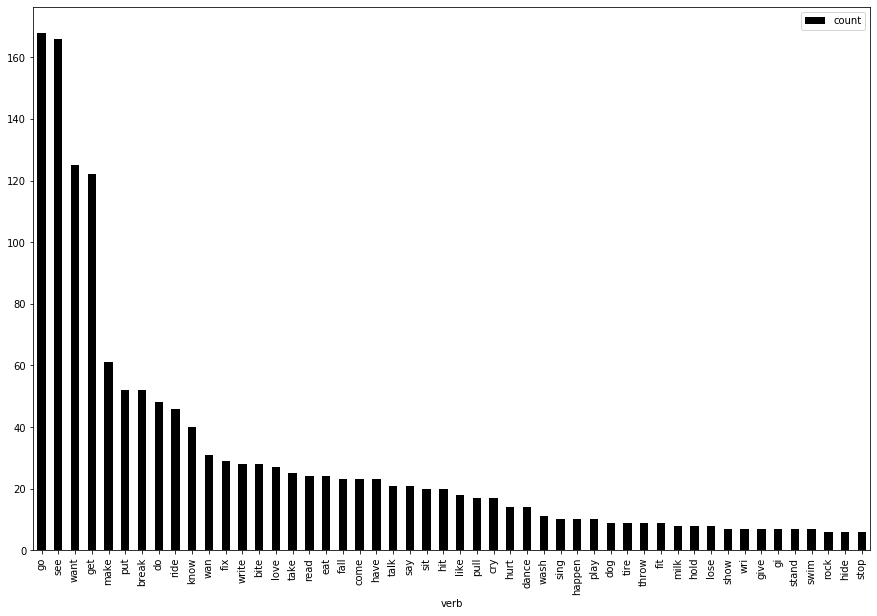

In [27]:
import matplotlib.pyplot as plt
from scipy import stats
import itertools
dfsarah[0:50].plot(x = 'verb', y = 'count',kind='bar',figsize = (15,10), legend = True,color="black")
plt.rcParams.update({'font.size': 12})
plt.savefig('All-Verbs-Sarah.png')
plt.show()

In [29]:
peterdf = df(Peter_verb)
peter_words = [i[0] for i in peterdf['verb'].values.tolist()]
peter_converb = []
for word in peter_words:
    peter_converb.append(WordNetLemmatizer().lemmatize(word,'v'))
peterdf['converb'] = peter_converb


peterdf2 = peterdf.groupby(['converb']).agg('sum')
peterdf = peterdf2.sort_values('count', inplace = False, ascending=False)
peterdf.to_csv('peterdf.csv')
dfpeter = pd.read_csv('peterdf.csv', sep =',')
dfpeter.colums = ['verb', 'count', 'rank']
dfpeter = dfpeter.rename(columns={"converb": "verb"})
dfpeter = dfpeter.drop(columns = ['rank'])
dfpeter

/Users/Ershui13/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  del sys.path[0]


,verb,count
0,go,728
1,put,450
2,get,407
3,see,277
4,write,256
...,...,...
419,ridin,1
420,decorate,1
421,daw,1
422,darn,1


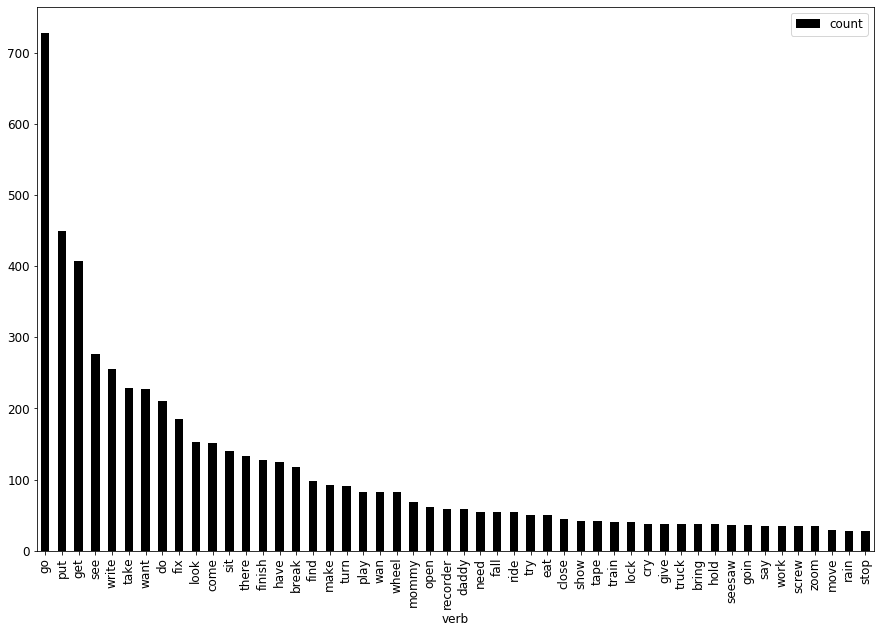

In [30]:
dfpeter[0:50].plot(x = 'verb', y = 'count',kind='bar',figsize = (15,10), legend = True,color="black")
plt.rcParams.update({'font.size': 12})
plt.savefig('All-Verbs-peter.png')
plt.show()

In [31]:
naomidf = df(Naomi_verb)
naomi_words = [i[0] for i in naomidf['verb'].values.tolist()]
naomi_converb = []
for word in naomi_words:
    naomi_converb.append(WordNetLemmatizer().lemmatize(word,'v'))
naomidf['converb'] = naomi_converb


naomidf2 = naomidf.groupby(['converb']).agg('sum')
naomidf = naomidf2.sort_values('count', inplace = False, ascending=False)
naomidf.to_csv('naomidf.csv')
dfnaomi = pd.read_csv('naomidf.csv', sep =',')
dfnaomi.colums = ['verb', 'count', 'rank']
dfnaomi = dfnaomi.rename(columns={"converb": "verb"})
dfnaomi = dfnaomi.drop(columns = ['rank'])
dfnaomi

/Users/Ershui13/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  del sys.path[0]


,verb,count
0,get,129
1,want,120
2,go,118
3,look,52
4,eat,42
...,...,...
123,listen,1
124,moo,1
125,pant,1
126,peek,1


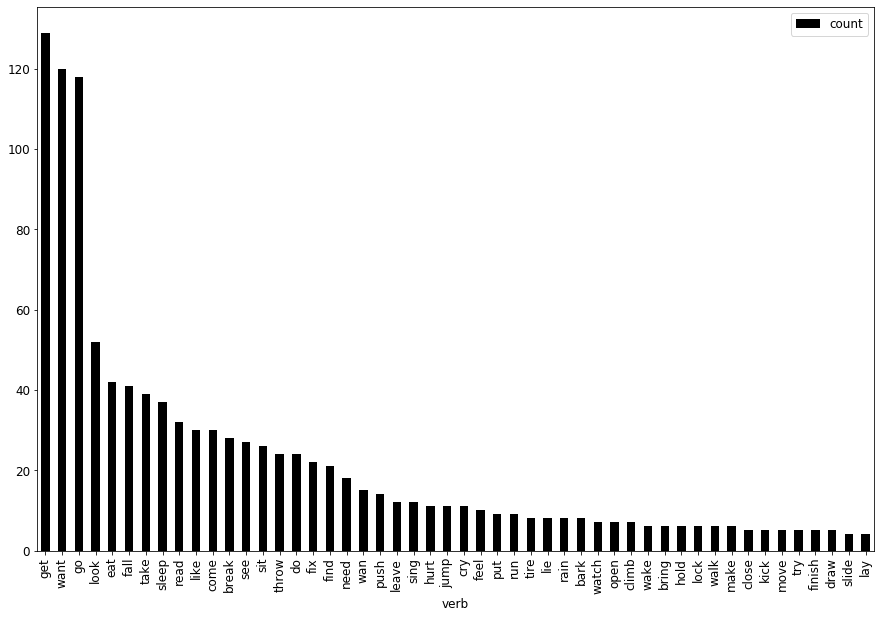

In [32]:
dfnaomi[0:50].plot(x = 'verb', y = 'count',kind='bar',figsize = (15,10), legend = True,color="black")
plt.rcParams.update({'font.size': 12})
plt.savefig('All-Verbs-naomi.png')
plt.show()

In [33]:
allisondf = df(Allison_verb)
allison_words = [i[0] for i in allisondf['verb'].values.tolist()]
allison_converb = []
for word in allison_words:
    allison_converb.append(WordNetLemmatizer().lemmatize(word,'v'))
allisondf['converb'] = allison_converb


allisondf2 = allisondf.groupby(['converb']).agg('sum')
allisondf = allisondf2.sort_values('count', inplace = False, ascending=False)
allisondf.to_csv('allisondf.csv')
dfallison = pd.read_csv('allisondf.csv', sep =',')
dfallison.colums = ['verb', 'count', 'rank']
dfallison = dfallison.rename(columns={"converb": "verb"})
dfallison = dfallison.drop(columns = ['rank'])
dfallison

/Users/Ershui13/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  del sys.path[0]


,verb,count
0,go,65
1,want,57
2,sit,34
3,put,30
4,eat,29
...,...,...
83,scream,1
84,screw,1
85,let,1
86,shake,1


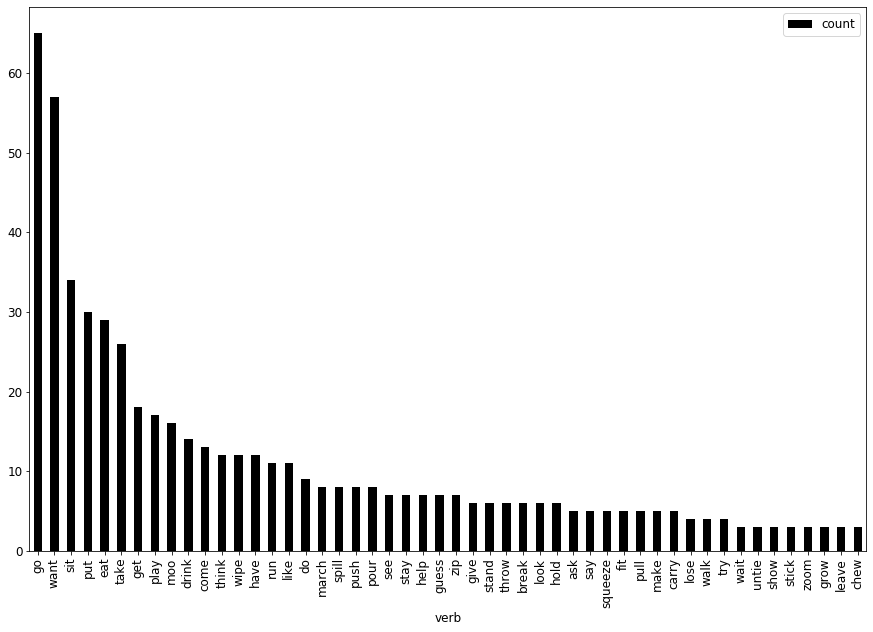

In [34]:
dfallison[0:50].plot(x = 'verb', y = 'count',kind='bar',figsize = (15,10), legend = True,color="black")
plt.rcParams.update({'font.size': 12})
plt.savefig('All-Verbs-allison.png')
plt.show()

In [305]:
adamdf = df(Adam_verb)

In [35]:
aprildf = df(April_verb)
april_words = [i[0] for i in aprildf['verb'].values.tolist()]
april_converb = []
for word in april_words:
    april_converb.append(WordNetLemmatizer().lemmatize(word,'v'))
aprildf['converb'] = april_converb


aprildf2 = aprildf.groupby(['converb']).agg('sum')
aprildf = aprildf2.sort_values('count', inplace = False, ascending=False)
aprildf.to_csv('aprildf.csv')
dfapril = pd.read_csv('aprildf.csv', sep =',')
dfapril.colums = ['verb', 'count', 'rank']
dfapril = dfapril.rename(columns={"converb": "verb"})
dfapril = dfapril.drop(columns = ['rank'])
dfapril

/Users/Ershui13/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  del sys.path[0]


,verb,count
0,read,11
1,put,10
2,get,8
3,make,6
4,hold,6
5,do,6
6,set,5
7,buy,5
8,see,5
9,scoot,4


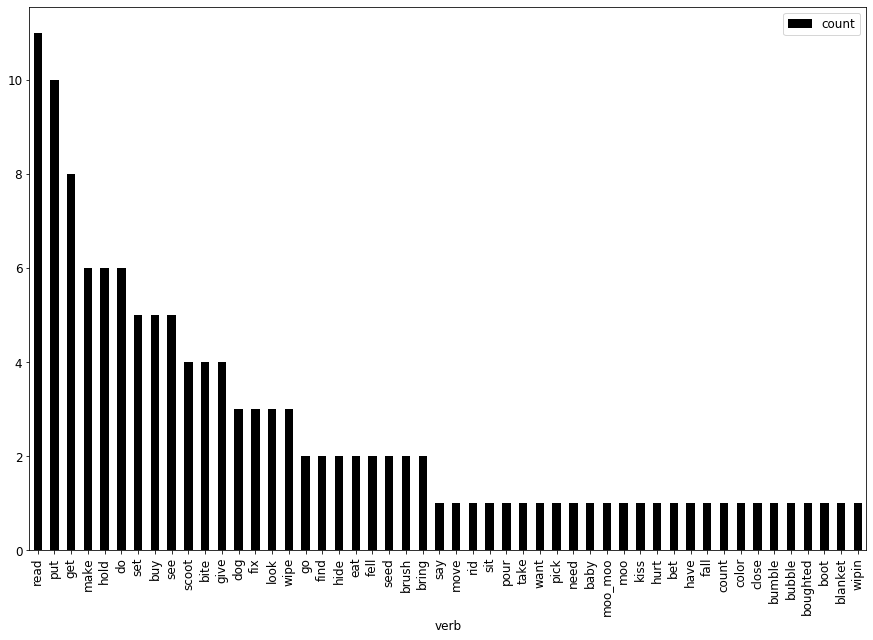

In [36]:
dfapril[0:50].plot(x = 'verb', y = 'count',kind='bar',figsize = (15,10), legend = True,color="black")
plt.rcParams.update({'font.size': 12})
plt.savefig('All-Verbs-april.png')
plt.show()

In [306]:
from nltk.stem.wordnet import WordNetLemmatizer
words = [i[0] for i in adamdf['verb'].values.tolist()]
converb = []
for word in words:
    converb.append(WordNetLemmatizer().lemmatize(word,'v'))
adamdf['converb'] = converb

In [309]:
adamdf.to_csv('converbAdam.csv')

In [299]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/Ershui13/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [312]:
adamdf

,verb,count,rank,converb
0,"(go, v)",601,1,go
1,"(put, v)",351,2,put
2,"(see, v)",281,3,see
3,"(want, v)",244,4,want
4,"(get, v)",205,5,get
...,...,...,...,...
454,"(baby, v)",1,455,baby
455,"(works, v)",1,456,work
456,"(mix, v)",1,457,mix
457,"(goin, part)",1,458,goin


In [334]:
adamdf.to_csv('adamdf.csv')
dfadam = pd.read_csv('adamdf.csv', sep =',')
dfadam.colums = ['verb', 'count', 'rank']


/Users/Ershui13/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until


In [330]:
adamdf2 = adamdf.groupby(['converb']).agg('sum')
adamdf = adamdf2.sort_values('count', inplace = False, ascending=False)

In [337]:
dfadam = dfadam.rename(columns={"converb": "verb"})
dfadam = dfadam.drop(columns = ['rank'])

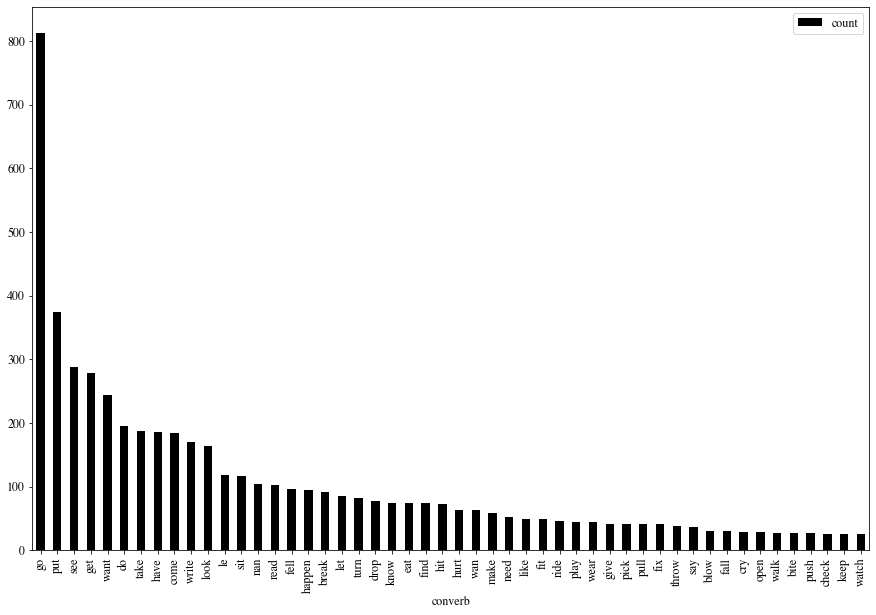

In [333]:
dfadam[0:50].plot(x = 'converb', y = 'count',kind='bar',figsize = (15,10), legend = True,color="black")
plt.rcParams.update({'font.size': 12})
plt.show()

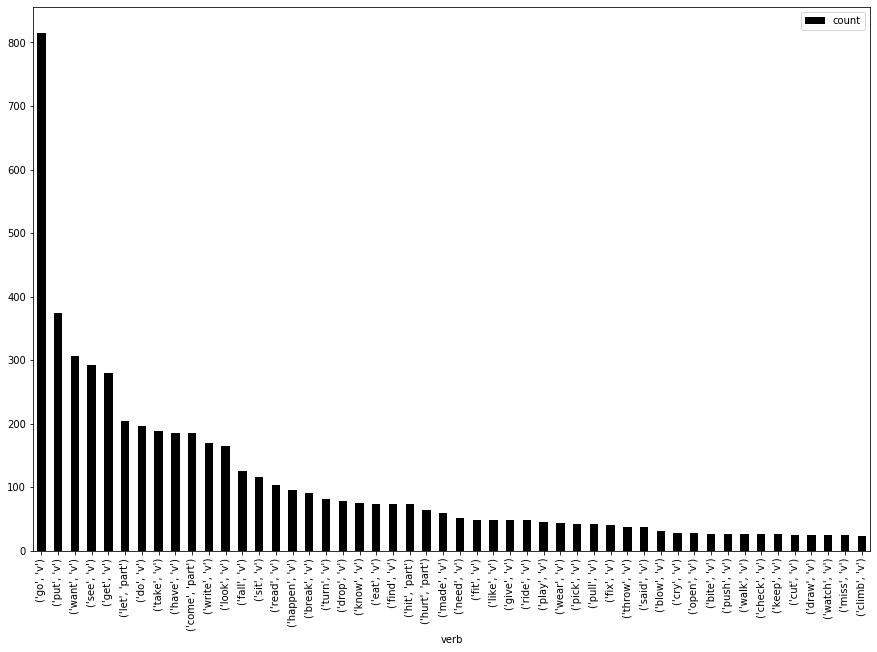

In [4]:
import matplotlib.pyplot as plt
from scipy import stats
import itertools

Adam_all_verb = pd.read_csv('Adam_verb_count.csv', sep = '\t', header = None)
Adam_all_verb.columns = ['verb', 'count']
Adam_all_verb['rank'] = list(range(1,len(Adam_all_verb)+1))
Adam_all_verb[0:50].plot(x = 'verb', y = 'count',kind='bar',figsize = (15,10), legend = True,color="black")
plt.rcParams.update({'font.size': 12})
plt.savefig('Adam_all_verb.jpg')
plt.show()

In [349]:
Adam_mot_verb = []
for i in Adam.tagged_words(speaker = ['MOT']):
    if i[1] == 'v' or i[1] == 'part':
        Adam_mot_verb.append(i)

In [350]:
df(Adam_mot_verb).to_csv('Adam_mot_verbs.csv')
adammotdf = df(Adam_mot_verb)
amotwords = [i[0] for i in adammotdf['verb'].values.tolist()]
amotconverb = []
for word in amotwords:
    amotconverb.append(WordNetLemmatizer().lemmatize(word,'v'))
adammotdf['converb'] = amotconverb

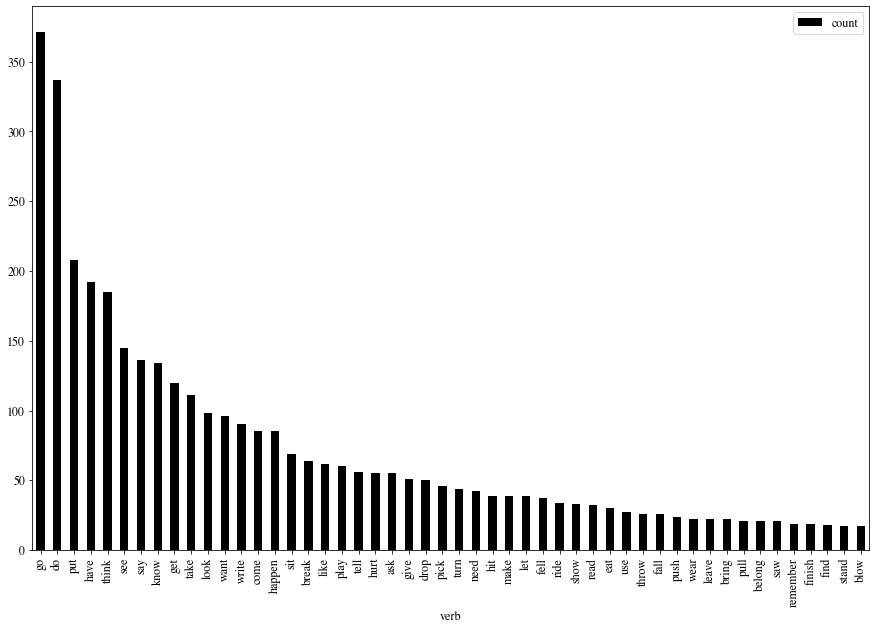

In [356]:
dfadammot[0:50].plot(x = 'verb', y = 'count',kind='bar',figsize = (15,10), legend = True,color="black")
plt.rcParams.update({'font.size': 12})
plt.savefig('All-Verbs-Adam-Mother.png')
plt.show()

In [353]:
adammotdf2 = adammotdf.groupby(['converb']).agg('sum')
adammotdf = adammotdf2.sort_values('count', inplace = False, ascending=False)
adammotdf.to_csv('adam_motdf.csv')
dfadammot = pd.read_csv('adam_motdf.csv', sep =',')
dfadammot.colums = ['verb', 'count', 'rank']
dfadammot = dfadammot.rename(columns={"converb": "verb"})
dfadammot = dfadammot.drop(columns = ['rank'])
dfadammot

/Users/Ershui13/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """


,verb,count
0,go,371
1,do,337
2,put,208
3,have,192
4,think,185
...,...,...
292,nose,1
293,bake,1
294,moo,1
295,mix,1


In [363]:
df(Eve_verb).to_csv('Eve_verbs.csv')
evedf = df(Eve_verb)
evewords = [i[0] for i in evedf['verb'].values.tolist()]
eveconverb = []
for word in evewords:
    eveconverb.append(WordNetLemmatizer().lemmatize(word,'v'))
evedf['converb'] = eveconverb

In [364]:
evedf2 = evedf.groupby(['converb']).agg('sum')
evedf = evedf2.sort_values('count', inplace = False, ascending=False)
evedf.to_csv('evedf.csv')
dfeve = pd.read_csv('evedf.csv', sep =',')
dfeve.colums = ['verb', 'count', 'rank']
dfeve = dfeve.rename(columns={"converb": "verb"})
dfeve = dfeve.drop(columns = ['rank'])
dfeve

/Users/Ershui13/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """


,verb,count
0,read,45
1,have,37
2,go,36
3,sit,34
4,come,31
...,...,...
88,seed,1
89,shop,1
90,shut,1
91,sing,1


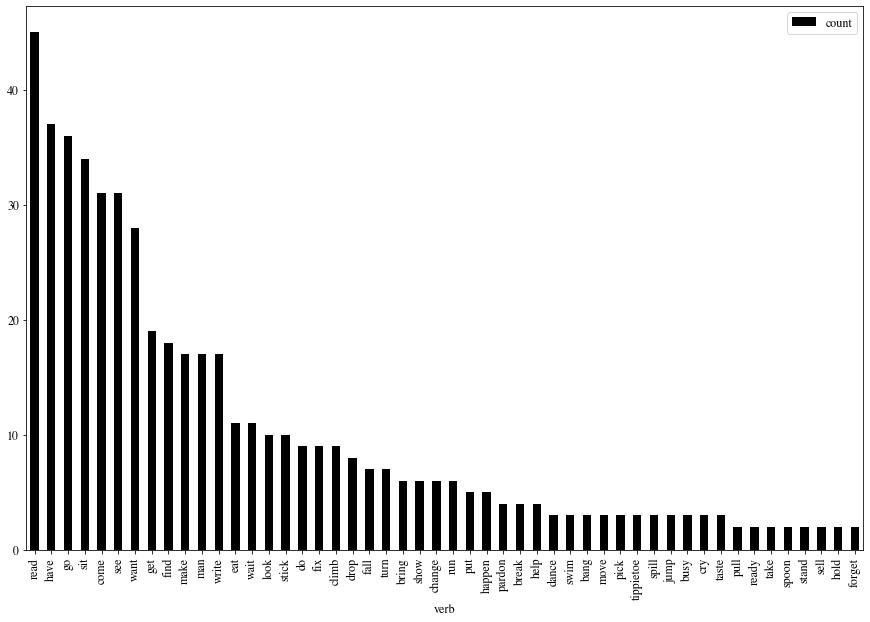

In [365]:
dfeve[0:50].plot(x = 'verb', y = 'count',kind='bar',figsize = (15,10), legend = True,color="black")
plt.rcParams.update({'font.size': 12})
plt.savefig('All-Verbs-Eve.png')
plt.show()

In [370]:
df(Eve_verb_mot).to_csv('Eve_mot_verbs.csv')
evemotdf = df(Eve_verb_mot)
evemotwords = [i[0] for i in evemotdf['verb'].values.tolist()]
evemotconverb = []
for word in evemotwords:
    evemotconverb.append(WordNetLemmatizer().lemmatize(word,'v'))
evemotdf['converb'] = evemotconverb

evemotdf2 = evemotdf.groupby(['converb']).agg('sum')
evemotdf = evemotdf2.sort_values('count', inplace = False, ascending=False)
evemotdf.to_csv('evemotdf.csv')
dfevemot = pd.read_csv('evemotdf.csv', sep =',')
dfevemot.colums = ['verb', 'count', 'rank']
dfevemot = dfevemot.rename(columns={"converb": "verb"})
dfevemot = dfevemot.drop(columns = ['rank'])
dfevemot

/Users/Ershui13/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  del sys.path[0]


,verb,count
0,go,146
1,have,134
2,do,92
3,want,91
4,put,83
...,...,...
133,draw,1
134,skate,1
135,decorate,1
136,learn,1


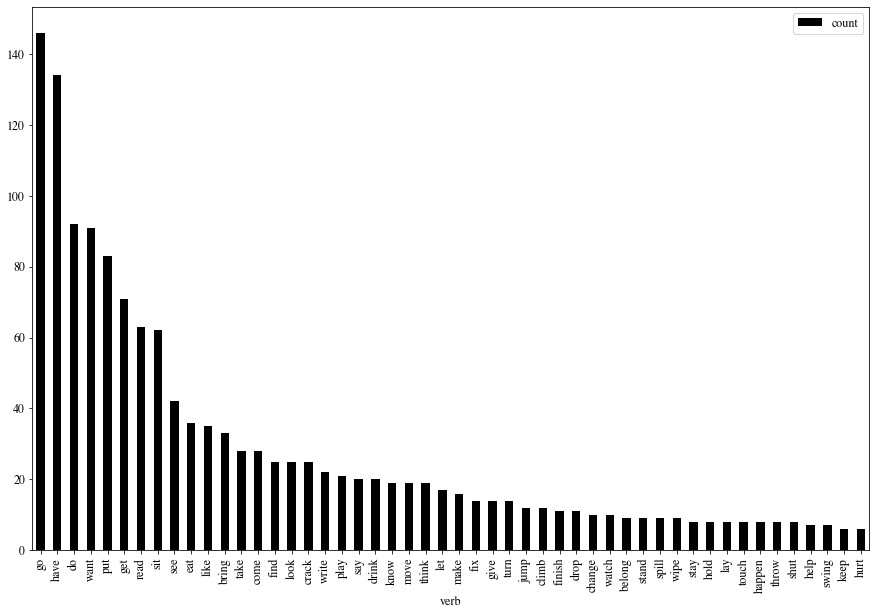

In [371]:
dfevemot[0:50].plot(x = 'verb', y = 'count',kind='bar',figsize = (15,10), legend = True,color="black")
plt.rcParams.update({'font.size': 12})
plt.savefig('All-Verbs-Eve-Mother.png')
plt.show()

In [376]:
df(Fraser_verb).to_csv('Fraser_verb.csv')
fradf = df(Fraser_verb)
frawords = [i[0] for i in fradf['verb'].values.tolist()]
fraconverb = []
for word in frawords:
    fraconverb.append(WordNetLemmatizer().lemmatize(word,'v'))
fradf['converb'] = fraconverb

fradf2 = fradf.groupby(['converb']).agg('sum')
fradf = fradf2.sort_values('count', inplace = False, ascending=False)
fradf.to_csv('fraserdf.csv')
dffra = pd.read_csv('fraserdf.csv', sep =',')
dffra.colums = ['verb', 'count', 'rank']
dffra = dffra.rename(columns={"converb": "verb"})
dffra = dffra.drop(columns = ['rank'])
dffra

/Users/Ershui13/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  del sys.path[0]


,verb,count
0,go,3199
1,get,979
2,do,887
3,come,721
4,know,550
...,...,...
366,lef,1
367,lick,1
368,line,1
369,log,1


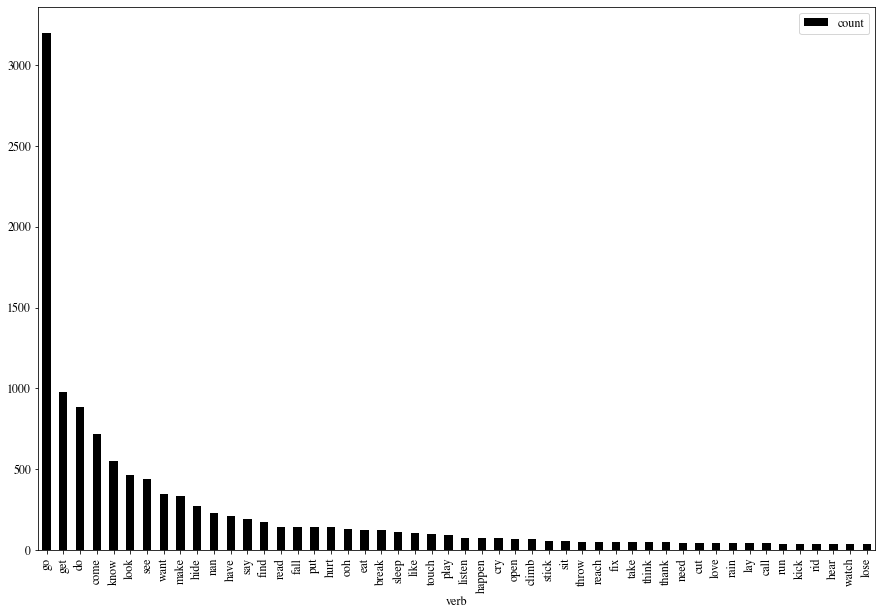

In [377]:
dffra[0:50].plot(x = 'verb', y = 'count',kind='bar',figsize = (15,10), legend = True,color="black")
plt.rcParams.update({'font.size': 12})
plt.savefig('All-Verbs-Fraser.png')
plt.show()

In [382]:
df(Fraser_verb_mot).to_csv('Fraser_verb_mot.csv')
framotdf = df(Fraser_verb_mot)
framotwords = [i[0] for i in framotdf['verb'].values.tolist()]
framotconverb = []
for word in framotwords:
    framotconverb.append(WordNetLemmatizer().lemmatize(word,'v'))
framotdf['converb'] = framotconverb

framotdf2 = framotdf.groupby(['converb']).agg('sum')
framotdf = framotdf2.sort_values('count', inplace = False, ascending=False)
framotdf.to_csv('framotserdf.csv')
dfframot = pd.read_csv('framotserdf.csv', sep =',')
dfframot.colums = ['verb', 'count', 'rank']
dfframot = dfframot.rename(columns={"converb": "verb"})
dfframot = dfframot.drop(columns = ['rank'])
dfframot

/Users/Ershui13/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  del sys.path[0]


,verb,count
0,go,4921
1,do,3326
2,get,2151
3,come,1783
4,have,1568
...,...,...
576,ouch,1
577,ouching,1
578,parcel,1
579,paste,1


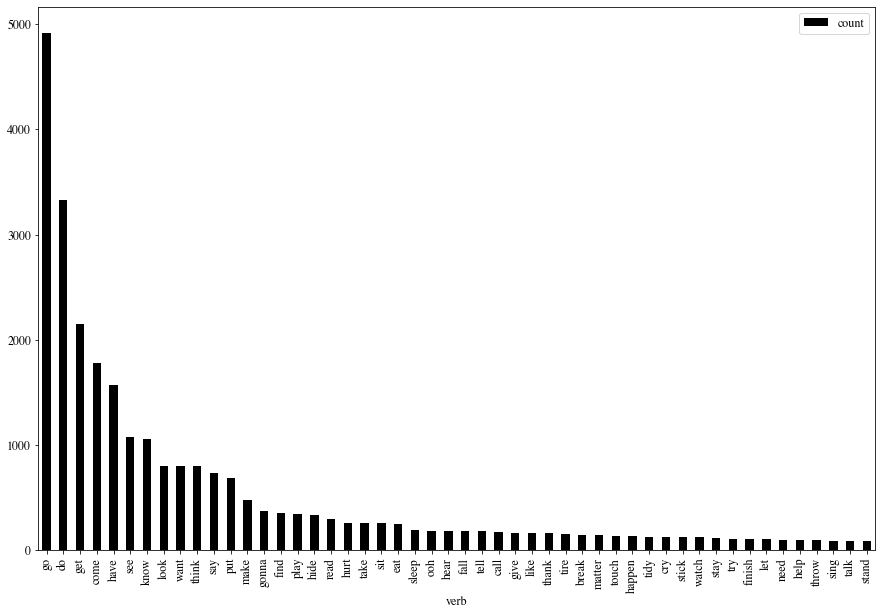

In [383]:
dfframot[0:50].plot(x = 'verb', y = 'count',kind='bar',figsize = (15,10), legend = True,color="black")
plt.rcParams.update({'font.size': 12})
plt.savefig('All-Verbs-Fraser-Mother.png')
plt.show()

In [134]:
get_mot_rank(Peter_mot_verb, 'Peter')

/Users/Ershui13/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  if sys.path[0] == '':


,verb,count
0,go,1050
1,put,1036
2,do,757
3,see,721
4,think,681
...,...,...
628,label,1
629,knee,1
630,kit,1
631,kinds,1


In [107]:
get_mot_rank(Peter_mot_verb, 'Peter')

/Users/Ershui13/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  if sys.path[0] == '':


,verb,count
0,go,356
1,get,309
2,do,244
3,have,149
4,know,136
...,...,...
288,shake,1
289,set,1
290,havin,1
291,scribble,1


In [ ]:
eveir = eve

In [109]:
def irrverb(i,k,w):
    dfkk = get_rank(i,k)
    dfkk_mot = get_mot_rank(w,k)
    kkir = dfkk.loc[dfkk['verb'].isin (irrr)]
    kkir.to_csv('{}ir.csv'.format(k))
    kk_motir = dfkk_mot.loc[dfkk_mot['verb'].isin (irrr)]
    kk_motir.to_csv('{}irmot.csv'.format(k))
    UP = len(dfkk_mot)
    dfkk_mot['rank'] = list(range(1,len(dfkk_mot)+1))
    k_a_p = Powerlawfit(dfkk_mot).plf()[0]
    UC = len(dfkk)
    dfkk['rank'] = list(range(1,len(dfkk)+1))
    kkir['rank'] = list(range(1,len(kkir)+1))
    kk_motir['rank'] = list(range(1,len(kk_motir)+1))
    k_a_c = Powerlawfit(dfkk).plf()[0]
    ep = len(kk_motir)
    ec = len(kkir)
    k_b_c = Powerlawfit(kkir).plf()[0]
    k_b_p = Powerlawfit(kk_motir).plf()[0]
    print (k, 'Up:', float(str(round(UP, 2))), 'ap:', float(str(round(k_a_p, 2))), 'Uc:', float(str(round(UC,2))), 
           'ac:',float(str(round(k_a_c, 2))), 'ep:', float(str(round(ep, 2))), 
           'bp:',float(str(round(k_b_p, 2))),'ec:',float(str(round(ec, 2))),'bc:',float(str(round(k_b_c, 2))) )

In [62]:
Powerlawfit(Sarah_verb)

In [93]:
from scipy import optimize

In [324]:
for (i,k,w) in zip(verblist, child_name, verb_mot_list):
    irrverb(i,k,w)

NameError: name 'verblist' is not defined

In [132]:
irrverb(Peter_verb, 'Peter', Peter_mot_verb)

/Users/Ershui13/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  if sys.path[0] == '':
/Users/Ershui13/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/Users/Ershui13/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

Peter Up: 633 ap: -0.6380047481192876 Uc: 424 ac: -0.6860314257878443 ep: 83 bp: -0.5113068660018174 ec: 67 bc: -0.535253075212625


In [140]:
irrverb(Naomi_verb, 'Naomi', Naomi_mot_verb)

Naomi Up: 222 ap: -0.7722341197812639 Uc: 128 ac: -0.7610208270319554 ep: 62 bp: -0.6341438414306634 ec: 43 bc: -0.6563623411651318


/Users/Ershui13/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  if sys.path[0] == '':
/Users/Ershui13/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/Users/Ershui13/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

In [434]:
irverb = pd.read_csv('irregular_verb.csv', header = None)
irverb.drop_duplicates(inplace=True) 
irrr = list(itertools.chain(*irverb.values.tolist()))

['be',
 'awake',
 'bear',
 'become',
 'begin',
 'bend',
 'bid',
 'bind',
 'bite',
 'bleed',
 'blow',
 'break',
 'breed',
 'bring',
 'build',
 'burn',
 'buy',
 'catch',
 'choose',
 'cling',
 'come',
 'creep',
 'deal',
 'dig',
 'dive',
 'do',
 'draw',
 'dream',
 'drive',
 'drink',
 'eat',
 'fall',
 'feed',
 'feel',
 'fight',
 'find',
 'flee',
 'fling',
 'fly',
 'forbid',
 'forget',
 'forego',
 'forgive',
 'forsake',
 'freeze',
 'get',
 'give',
 'go',
 'grind',
 'grow',
 'have',
 'hang',
 'hear',
 'hide',
 'hold',
 'keep',
 'kneel',
 'know',
 'lay',
 'lead',
 'leap',
 'learn',
 'leave',
 'lend',
 'lie',
 'light',
 'look',
 'lose',
 'make',
 'mean',
 'meet',
 'misspell',
 'mistake',
 'mow',
 'overcome',
 'overdo',
 'overtake',
 'overthrow',
 'pay',
 'plead',
 'prove',
 'ride',
 'ring',
 'rise',
 'run',
 'saw',
 'say',
 'see',
 'seek',
 'sell',
 'send',
 'sew',
 'shake',
 'shave',
 'shear',
 'shine',
 'shoe',
 'shoot',
 'show',
 'shrink',
 'sing',
 'sink',
 'sit',
 'sleep',
 'slay',
 'slide

In [408]:
framotir = dfframot.loc[dfframot['verb'].isin (irrr)].drop(columns =['rank'])
framotir.to_csv('framotir.csv')

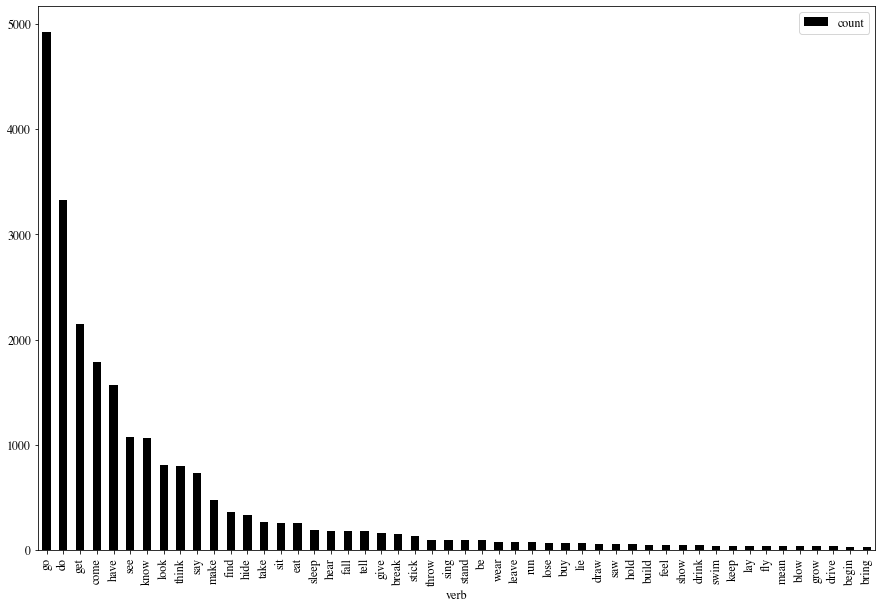

In [410]:
framotir[0:50].plot(x = 'verb', y = 'count',kind='bar',figsize = (15,10), legend = True,color="black")
plt.rcParams.update({'font.size': 12})
plt.savefig('All-Irregular-Verbs-Fraser-Mother.png')
plt.show()

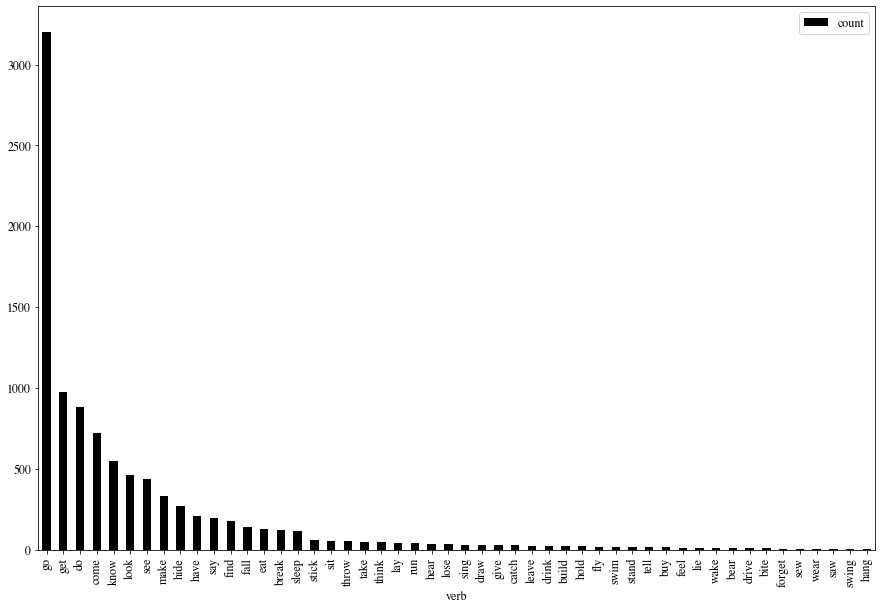

In [415]:
frair = dffra.loc[dffra['verb'].isin (irrr)].drop(columns =['rank'])
frair.to_csv('frair.csv')
frair[0:50].plot(x = 'verb', y = 'count',kind='bar',figsize = (15,10), legend = True,color="black")
plt.rcParams.update({'font.size': 12})
plt.savefig('All-Irregular-Verbs-Fraser.png')
plt.show()

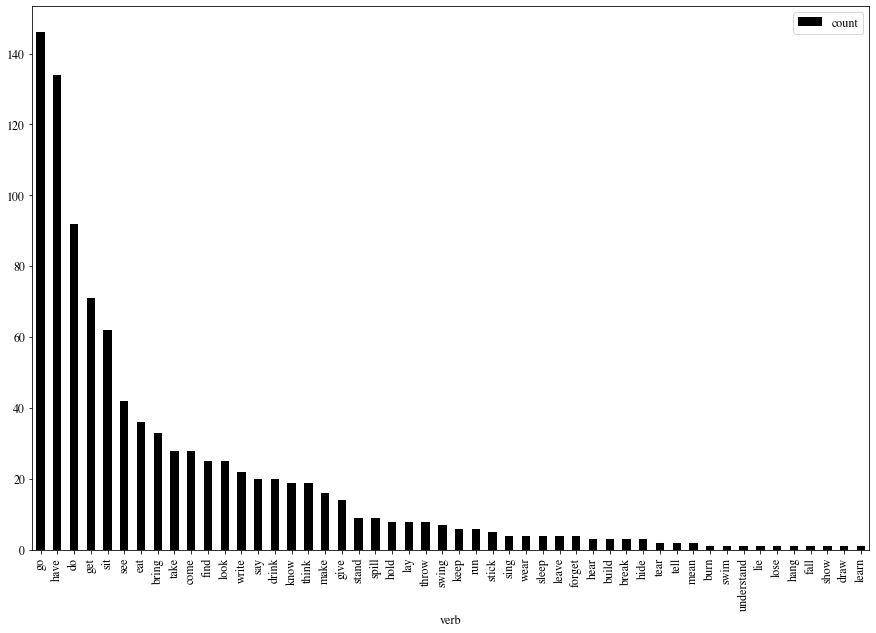

In [419]:
evemotir = dfevemot.loc[dfevemot['verb'].isin (irrr)].drop(columns =['rank'])
evemotir.to_csv('evemotir.csv')
evemotir[0:50].plot(x = 'verb', y = 'count',kind='bar',figsize = (15,10), legend = True,color="black")
plt.rcParams.update({'font.size': 12})
plt.savefig('All-Irregular-Verbs-Eve-Mother.png')
plt.show()

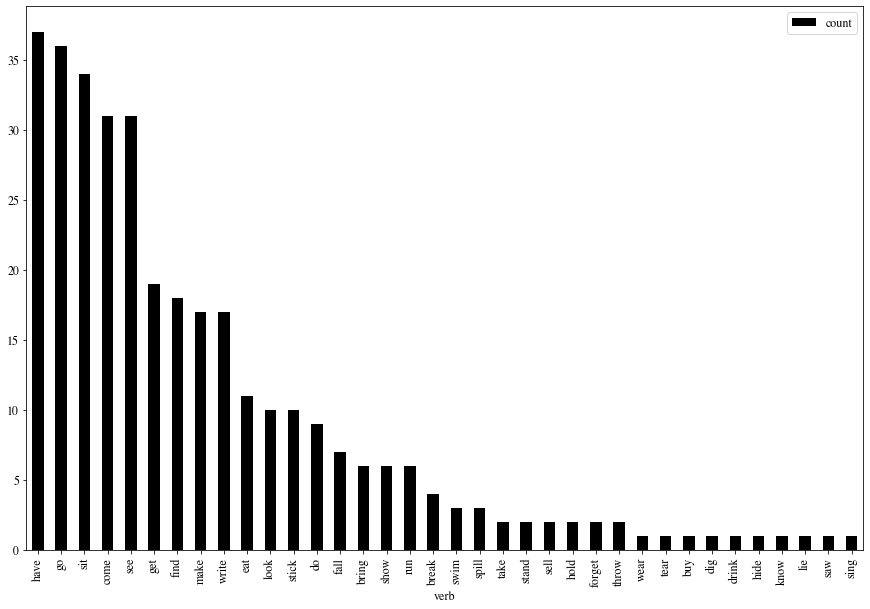

In [423]:
eveir = dfeve.loc[dfeve['verb'].isin (irrr)].drop(columns =['rank'])
eveir.to_csv('eveir.csv')
eveir[0:50].plot(x = 'verb', y = 'count',kind='bar',figsize = (15,10), legend = True,color="black")
plt.rcParams.update({'font.size': 12})
plt.savefig('All-Irregular-Verbs-Eve.png')
plt.show()

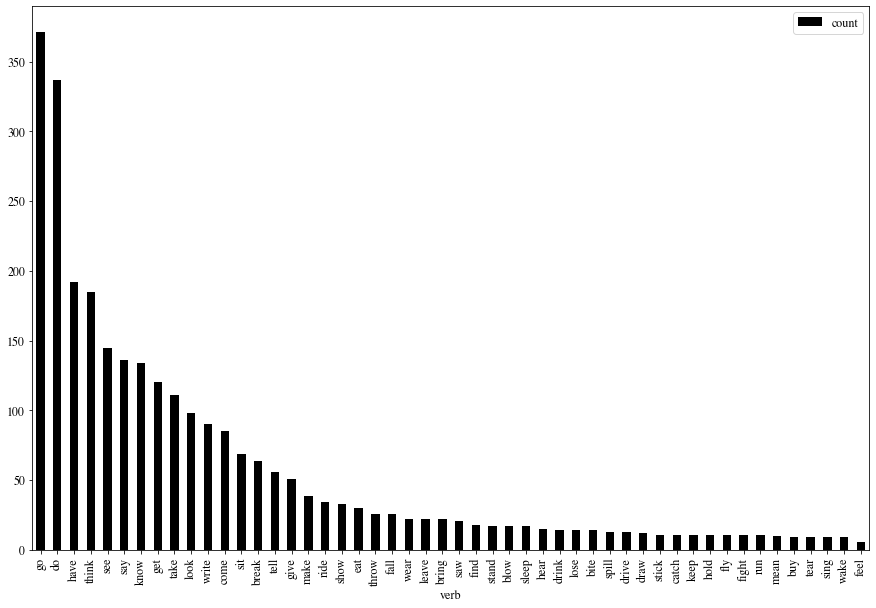

In [429]:
adammotir = dfadammot.loc[dfadammot['verb'].isin (irrr)].drop(columns =['rank'])
adammotir.to_csv('adammotir.csv')
adammotir[0:50].plot(x = 'verb', y = 'count',kind='bar',figsize = (15,10), legend = True,color="black")
plt.rcParams.update({'font.size': 12})
plt.savefig('All-Irregular-Verbs-Adam-Mother.png')
plt.show()

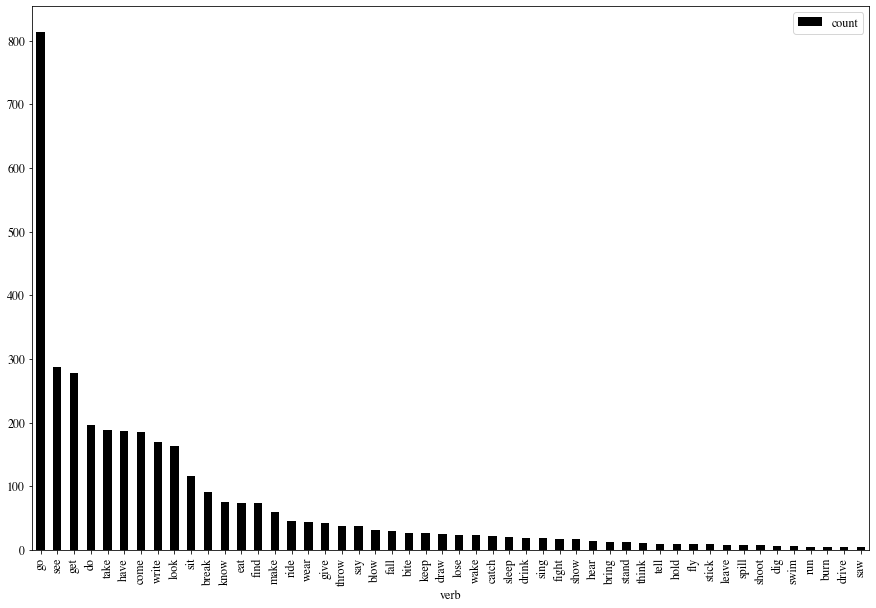

In [430]:
adamir = dfadam.loc[dfadam['verb'].isin (irrr)].drop(columns =['rank'])
adamir.to_csv('adamir.csv')
adamir[0:50].plot(x = 'verb', y = 'count',kind='bar',figsize = (15,10), legend = True,color="black")
plt.rcParams.update({'font.size': 12})
plt.savefig('All-Irregular-Verbs-Adam.png')
plt.show()

NameError: name 'adamir' is not defined

In [441]:
frair

,verb,count,rank
0,go,3199,1
1,get,979,2
2,do,887,3
3,come,721,4
4,know,550,5
...,...,...,...
288,bend,1,74
294,burn,1,75
310,send,1,76
346,spin,1,77


In [442]:
framotir

,verb,count,rank
0,go,4921,1
1,do,3326,2
2,get,2151,3
3,come,1783,4
4,have,1568,5
...,...,...,...
457,dream,1,93
477,cling,1,94
478,awake,1,95
565,leap,1,96


In [440]:
eveir

,verb,count,rank
1,have,37,1
2,go,36,2
3,sit,34,3
4,come,31,4
5,see,31,5
7,get,19,6
8,find,18,7
9,make,17,8
11,write,17,9
12,eat,11,10


In [439]:
evemotir

,verb,count,rank
0,go,146,1
1,have,134,2
2,do,92,3
5,get,71,4
7,sit,62,5
8,see,42,6
9,eat,36,7
11,bring,33,8
12,take,28,9
13,come,28,10


In [438]:
adamir

,verb,count,rank
0,go,813,1
2,see,288,2
3,get,278,3
5,do,196,4
6,take,188,5
...,...,...,...
204,send,2,58
225,grow,2,59
233,tear,1,60
257,string,1,61


In [437]:
adammotir

,verb,count,rank
0,go,371,1
1,do,337,2
3,have,192,3
4,think,185,4
5,see,145,5
...,...,...,...
219,teach,1,66
270,sink,1,67
271,shine,1,68
274,send,1,69


In [433]:
adammotir['rank'] = list(range(1,len(adammotir)+1))
a_b_p= Powerlawfit(adammotir)
a_b_p.plf()

(-0.6410028662057046, 2355.4450198529385)

In [431]:
adamir['rank'] = list(range(1,len(adamir)+1))
a_b_c= Powerlawfit(adamir)
a_b_c.plf()

(-0.6071907739571968, 3304.669056959449)

In [426]:
eveir['rank'] = list(range(1,len(eveir)+1))
e_b_c= Powerlawfit(eveir)
e_b_c.plf()

(-0.7256700289767166, 171.7581738897447)

In [420]:
evemotir['rank'] = list(range(1,len(evemotir)+1))
e_b_p= Powerlawfit(evemotir)
e_b_p.plf()

(-0.6485976670171452, 694.9800476953536)

In [411]:
framotir['rank'] = list(range(1,len(framotir)+1))
f_b_p= Powerlawfit(framotir)
f_b_p.plf()

(-0.4426701713035354, 86503.34870296139)

In [416]:
frair['rank'] = list(range(1,len(frair)+1))
f_b_c= Powerlawfit(frair)
f_b_c.plf()

(-0.4894427936461518, 17781.607264355018)

In [384]:
dfframot['rank'] = list(range(1,len(dfframot)+1))
f_a_p= Powerlawfit(dfframot)
f_a_p.plf()

(-0.5552024056934625, 84920.45021597766)

In [378]:
dffra['rank'] = list(range(1,len(dffra)+1))
f_a_c= Powerlawfit(dffra)
f_a_c.plf()

(-0.5973351189616755, 20782.386087796338)

In [372]:
dfevemot['rank'] = list(range(1,len(dfevemot)+1))
e_a_p = Powerlawfit(dfevemot)
e_a_p.plf()

(-0.7354275923933312, 921.7285362447327)

In [366]:
dfeve['rank'] = list(range(1,len(dfeve)+1))
e_a_c = Powerlawfit(dfeve)
e_a_c.plf()[0]

-0.8385681645431206

In [358]:
dfadammot['rank'] = list(range(1,len(dfadammot)+1))
Powerlawfit(dfadammot).plf()

(-0.6888192823158455, 3995.7482872624937)

In [339]:
dfadam['rank'] = list(range(1,len(dfadam)+1))
Powerlawfit(dfadam).plf()

(-0.6588171117805677, 7195.187213338273)

In [359]:
a_a_p = Powerlawfit(dfadammot)

In [341]:
a_a_c = Powerlawfit(dfadam)
a_a_c.plf()[0]

-0.6588171117805677

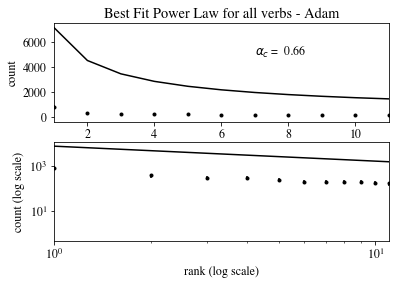

In [348]:
xdata = a_a_c.x()
ydata = a_a_c.y()
yerr = 0.2 * ydata 
amp = a_a_c.plf()[1]
alpha = a_a_c.plf()[0]

powerlaw = lambda x, amp, alpha: amp*(x**(alpha))

plt.clf()
plt.subplot(2, 1, 1)
plt.plot(xdata, powerlaw(xdata, amp, alpha),color = 'black')     # Fit
plt.errorbar(xdata, ydata, yerr=yerr, fmt='k.')  # Data
plt.text(7, 5000, r'$\alpha_c$ = %5.2f' % (-alpha))
plt.title('Best Fit Power Law for all verbs - Adam')
plt.xlabel('rank')
plt.ylabel('count')
plt.xlim(1, 11)

plt.subplot(2, 1, 2)
plt.loglog(xdata, powerlaw(xdata, amp, alpha), color = 'black')
plt.errorbar(xdata, ydata, yerr=yerr, fmt='k.')  # Data
plt.xlabel('rank (log scale)')
plt.ylabel('count (log scale)')
plt.xlim(1.0, 11)
plt.savefig('Best Fit Power Law for all verbs - Adam.png', bbox_inches='tight')

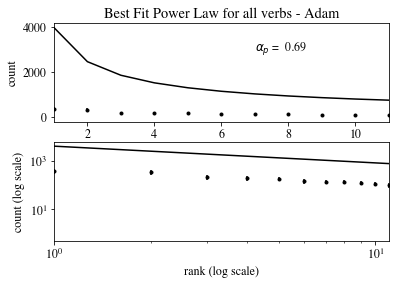

In [361]:
xdata = a_a_p.x()
ydata = a_a_p.y()
yerr = 0.2 * ydata 
amp = a_a_p.plf()[1]
alpha = a_a_p.plf()[0]

powerlaw = lambda x, amp, alpha: amp*(x**(alpha))

plt.clf()
plt.subplot(2, 1, 1)
plt.plot(xdata, powerlaw(xdata, amp, alpha),color = 'black')     # Fit
plt.errorbar(xdata, ydata, yerr=yerr, fmt='k.')  # Data
plt.text(7, 3000, r'$\alpha_p$ = %5.2f' % (-alpha))
plt.title('Best Fit Power Law for all verbs - Adam')
plt.xlabel('rank')
plt.ylabel('count')
plt.xlim(1, 11)

plt.subplot(2, 1, 2)
plt.loglog(xdata, powerlaw(xdata, amp, alpha), color = 'black')
plt.errorbar(xdata, ydata, yerr=yerr, fmt='k.')  # Data
plt.xlabel('rank (log scale)')
plt.ylabel('count (log scale)')
plt.xlim(1.0, 11)
plt.savefig('Best Fit Power Law for all verbs - Adam Mother.png', bbox_inches='tight')

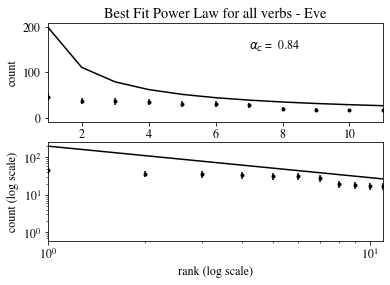

In [369]:
xdata = e_a_c.x()
ydata = e_a_c.y()
yerr = 0.2 * ydata 
amp = e_a_c.plf()[1]
alpha = e_a_c.plf()[0]

powerlaw = lambda x, amp, alpha: amp*(x**(alpha))

plt.clf()
plt.subplot(2, 1, 1)
plt.plot(xdata, powerlaw(xdata, amp, alpha),color = 'black')     # Fit
plt.errorbar(xdata, ydata, yerr=yerr, fmt='k.')  # Data
plt.text(7, 150, r'$\alpha_c$ = %5.2f' % (-alpha))
plt.title('Best Fit Power Law for all verbs - Eve')
plt.xlabel('rank')
plt.ylabel('count')
plt.xlim(1, 11)

plt.subplot(2, 1, 2)
plt.loglog(xdata, powerlaw(xdata, amp, alpha), color = 'black')
plt.errorbar(xdata, ydata, yerr=yerr, fmt='k.')  # Data
plt.xlabel('rank (log scale)')
plt.ylabel('count (log scale)')
plt.xlim(1.0, 11)
plt.savefig('EAC.png', bbox_inches='tight')

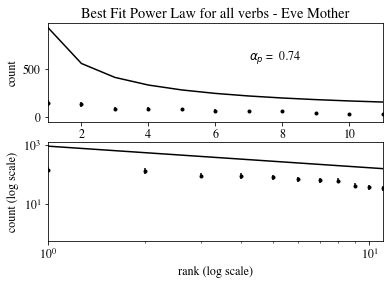

In [374]:
xdata = e_a_p.x()
ydata = e_a_p.y()
yerr = 0.2 * ydata 
amp = e_a_p.plf()[1]
alpha = e_a_p.plf()[0]

powerlaw = lambda x, amp, alpha: amp*(x**(alpha))

plt.clf()
plt.subplot(2, 1, 1)
plt.plot(xdata, powerlaw(xdata, amp, alpha),color = 'black')     # Fit
plt.errorbar(xdata, ydata, yerr=yerr, fmt='k.')  # Data
plt.text(7, 600, r'$\alpha_p$ = %5.2f' % (-alpha))
plt.title('Best Fit Power Law for all verbs - Eve Mother')
plt.xlabel('rank')
plt.ylabel('count')
plt.xlim(1, 11)

plt.subplot(2, 1, 2)
plt.loglog(xdata, powerlaw(xdata, amp, alpha), color = 'black')
plt.errorbar(xdata, ydata, yerr=yerr, fmt='k.')  # Data
plt.xlabel('rank (log scale)')
plt.ylabel('count (log scale)')
plt.xlim(1.0, 11)
plt.savefig('EAP.png', bbox_inches='tight')

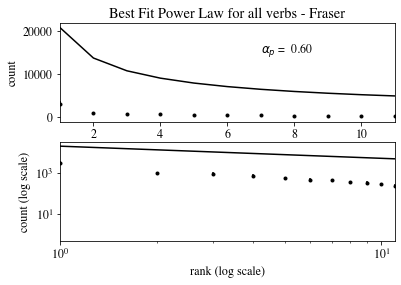

In [380]:
xdata = f_a_c.x()
ydata = f_a_c.y()
yerr = 0.2 * ydata 
amp = f_a_c.plf()[1]
alpha = f_a_c.plf()[0]

powerlaw = lambda x, amp, alpha: amp*(x**(alpha))

plt.clf()
plt.subplot(2, 1, 1)
plt.plot(xdata, powerlaw(xdata, amp, alpha),color = 'black')     # Fit
plt.errorbar(xdata, ydata, yerr=yerr, fmt='k.')  # Data
plt.text(7, 15000, r'$\alpha_p$ = %5.2f' % (-alpha))
plt.title('Best Fit Power Law for all verbs - Fraser')
plt.xlabel('rank')
plt.ylabel('count')
plt.xlim(1, 11)

plt.subplot(2, 1, 2)
plt.loglog(xdata, powerlaw(xdata, amp, alpha), color = 'black')
plt.errorbar(xdata, ydata, yerr=yerr, fmt='k.')  # Data
plt.xlabel('rank (log scale)')
plt.ylabel('count (log scale)')
plt.xlim(1.0, 11)
plt.savefig('FAC.png', bbox_inches='tight')

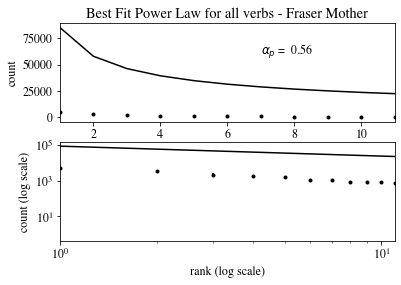

In [386]:
xdata = f_a_p.x()
ydata = f_a_p.y()
yerr = 0.2 * ydata 
amp = f_a_p.plf()[1]
alpha = f_a_p.plf()[0]

powerlaw = lambda x, amp, alpha: amp*(x**(alpha))

plt.clf()
plt.subplot(2, 1, 1)
plt.plot(xdata, powerlaw(xdata, amp, alpha),color = 'black')     # Fit
plt.errorbar(xdata, ydata, yerr=yerr, fmt='k.')  # Data
plt.text(7, 60000, r'$\alpha_p$ = %5.2f' % (-alpha))
plt.title('Best Fit Power Law for all verbs - Fraser Mother')
plt.xlabel('rank')
plt.ylabel('count')
plt.xlim(1, 11)

plt.subplot(2, 1, 2)
plt.loglog(xdata, powerlaw(xdata, amp, alpha), color = 'black')
plt.errorbar(xdata, ydata, yerr=yerr, fmt='k.')  # Data
plt.xlabel('rank (log scale)')
plt.ylabel('count (log scale)')
plt.xlim(1.0, 11)
plt.savefig('FAP.png', bbox_inches='tight')

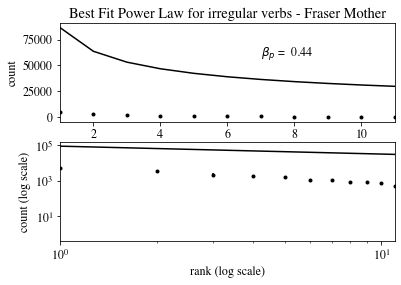

In [414]:
xdata = f_b_p.x()
ydata = f_b_p.y()
yerr = 0.2 * ydata 
amp = f_b_p.plf()[1]
alpha = f_b_p.plf()[0]

powerlaw = lambda x, amp, alpha: amp*(x**(alpha))

plt.clf()
plt.subplot(2, 1, 1)
plt.plot(xdata, powerlaw(xdata, amp, alpha),color = 'black')     # Fit
plt.errorbar(xdata, ydata, yerr=yerr, fmt='k.')  # Data
plt.text(7, 60000, r'$\beta_p$ = %5.2f' % (-alpha))
plt.title('Best Fit Power Law for irregular verbs - Fraser Mother')
plt.xlabel('rank')
plt.ylabel('count')
plt.xlim(1, 11)

plt.subplot(2, 1, 2)
plt.loglog(xdata, powerlaw(xdata, amp, alpha), color = 'black')
plt.errorbar(xdata, ydata, yerr=yerr, fmt='k.')  # Data
plt.xlabel('rank (log scale)')
plt.ylabel('count (log scale)')
plt.xlim(1.0, 11)
plt.savefig('FBP.png', bbox_inches='tight')

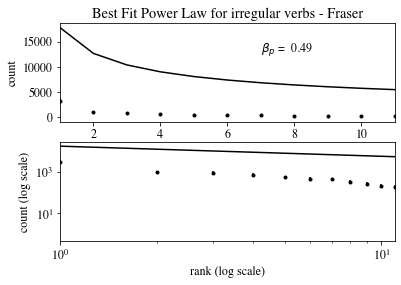

In [418]:
xdata = f_b_c.x()
ydata = f_b_c.y()
yerr = 0.2 * ydata 
amp = f_b_c.plf()[1]
alpha = f_b_c.plf()[0]

powerlaw = lambda x, amp, alpha: amp*(x**(alpha))

plt.clf()
plt.subplot(2, 1, 1)
plt.plot(xdata, powerlaw(xdata, amp, alpha),color = 'black')     # Fit
plt.errorbar(xdata, ydata, yerr=yerr, fmt='k.')  # Data
plt.text(7, 13000, r'$\beta_p$ = %5.2f' % (-alpha))
plt.title('Best Fit Power Law for irregular verbs - Fraser')
plt.xlabel('rank')
plt.ylabel('count')
plt.xlim(1, 11)

plt.subplot(2, 1, 2)
plt.loglog(xdata, powerlaw(xdata, amp, alpha), color = 'black')
plt.errorbar(xdata, ydata, yerr=yerr, fmt='k.')  # Data
plt.xlabel('rank (log scale)')
plt.ylabel('count (log scale)')
plt.xlim(1.0, 11)
plt.savefig('FBC.png', bbox_inches='tight')

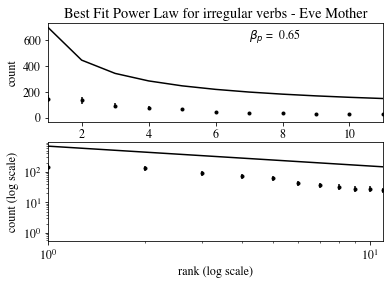

In [422]:
xdata = e_b_p.x()
ydata = e_b_p.y()
yerr = 0.2 * ydata 
amp = e_b_p.plf()[1]
alpha = e_b_p.plf()[0]

powerlaw = lambda x, amp, alpha: amp*(x**(alpha))

plt.clf()
plt.subplot(2, 1, 1)
plt.plot(xdata, powerlaw(xdata, amp, alpha),color = 'black')     # Fit
plt.errorbar(xdata, ydata, yerr=yerr, fmt='k.')  # Data
plt.text(7, 600, r'$\beta_p$ = %5.2f' % (-alpha))
plt.title('Best Fit Power Law for irregular verbs - Eve Mother')
plt.xlabel('rank')
plt.ylabel('count')
plt.xlim(1, 11)

plt.subplot(2, 1, 2)
plt.loglog(xdata, powerlaw(xdata, amp, alpha), color = 'black')
plt.errorbar(xdata, ydata, yerr=yerr, fmt='k.')  # Data
plt.xlabel('rank (log scale)')
plt.ylabel('count (log scale)')
plt.xlim(1.0, 11)
plt.savefig('EBP.png', bbox_inches='tight')

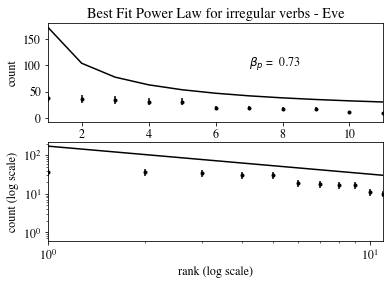

In [428]:
xdata = e_b_c.x()
ydata = e_b_c.y()
yerr = 0.2 * ydata 
amp = e_b_c.plf()[1]
alpha = e_b_c.plf()[0]

powerlaw = lambda x, amp, alpha: amp*(x**(alpha))

plt.clf()
plt.subplot(2, 1, 1)
plt.plot(xdata, powerlaw(xdata, amp, alpha),color = 'black')     # Fit
plt.errorbar(xdata, ydata, yerr=yerr, fmt='k.')  # Data
plt.text(7, 100, r'$\beta_p$ = %5.2f' % (-alpha))
plt.title('Best Fit Power Law for irregular verbs - Eve')
plt.xlabel('rank')
plt.ylabel('count')
plt.xlim(1, 11)

plt.subplot(2, 1, 2)
plt.loglog(xdata, powerlaw(xdata, amp, alpha), color = 'black')
plt.errorbar(xdata, ydata, yerr=yerr, fmt='k.')  # Data
plt.xlabel('rank (log scale)')
plt.ylabel('count (log scale)')
plt.xlim(1.0, 11)
plt.savefig('EBC.png', bbox_inches='tight')

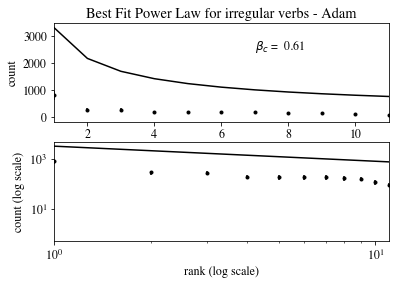

In [435]:
xdata = a_b_c.x()
ydata = a_b_c.y()
yerr = 0.2 * ydata 
amp = a_b_c.plf()[1]
alpha = a_b_c.plf()[0]

powerlaw = lambda x, amp, alpha: amp*(x**(alpha))

plt.clf()
plt.subplot(2, 1, 1)
plt.plot(xdata, powerlaw(xdata, amp, alpha),color = 'black')     # Fit
plt.errorbar(xdata, ydata, yerr=yerr, fmt='k.')  # Data
plt.text(7, 2500, r'$\beta_c$ = %5.2f' % (-alpha))
plt.title('Best Fit Power Law for irregular verbs - Adam')
plt.xlabel('rank')
plt.ylabel('count')
plt.xlim(1, 11)

plt.subplot(2, 1, 2)
plt.loglog(xdata, powerlaw(xdata, amp, alpha), color = 'black')
plt.errorbar(xdata, ydata, yerr=yerr, fmt='k.')  # Data
plt.xlabel('rank (log scale)')
plt.ylabel('count (log scale)')
plt.xlim(1.0, 11)
plt.savefig('ABC.png', bbox_inches='tight')

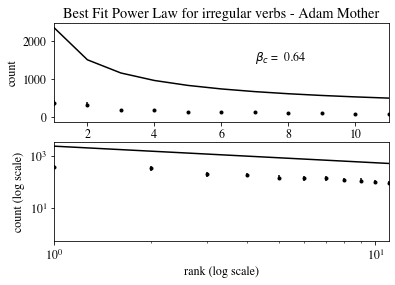

In [436]:
xdata = a_b_p.x()
ydata = a_b_p.y()
yerr = 0.2 * ydata 
amp = a_b_p.plf()[1]
alpha = a_b_p.plf()[0]

powerlaw = lambda x, amp, alpha: amp*(x**(alpha))

plt.clf()
plt.subplot(2, 1, 1)
plt.plot(xdata, powerlaw(xdata, amp, alpha),color = 'black')     # Fit
plt.errorbar(xdata, ydata, yerr=yerr, fmt='k.')  # Data
plt.text(7, 1500, r'$\beta_c$ = %5.2f' % (-alpha))
plt.title('Best Fit Power Law for irregular verbs - Adam Mother')
plt.xlabel('rank')
plt.ylabel('count')
plt.xlim(1, 11)

plt.subplot(2, 1, 2)
plt.loglog(xdata, powerlaw(xdata, amp, alpha), color = 'black')
plt.errorbar(xdata, ydata, yerr=yerr, fmt='k.')  # Data
plt.xlabel('rank (log scale)')
plt.ylabel('count (log scale)')
plt.xlim(1.0, 11)
plt.savefig('ABP.png', bbox_inches='tight')

In [12]:
Eve_verb = []
Eve_verb_mot = []
for i in Eve.tagged_words(speaker = ['CHI']):
    if i[1] == 'v' or i[1] == 'part':
        Eve_verb.append(i)
for i in Eve.tagged_words(speaker = ['MOT']):
    if i[1] == 'v' or i[1] == 'part':
        Eve_verb_mot.append(i)

In [81]:
from pandas import DataFrame
import pandas as pd

In [13]:
Fraser_verb = []
Fraser_verb_mot = []
for i in Fraser.tagged_words(speaker = ['CHI']):
    if i[1] == 'v' or i[1] == 'part':
        Fraser_verb.append(i)
for i in Fraser.tagged_words(speaker = ['MOT']):
    if i[1] == 'v' or i[1] == 'part':
        Fraser_verb_mot.append(i)

In [25]:
len(set(Fraser_verb))

625

In [30]:
list(set(Fraser_verb_mot))[500:]

[('have', 'v'),
 ('nibbling', 'part'),
 ('blowing', 'part'),
 ('still', 'v'),
 ('forming', 'part'),
 ('measured', 'part'),
 ('sorting', 'part'),
 ('hurried', 'v'),
 ('bouncing', 'part'),
 ('banging', 'part'),
 ('scratch', 'v'),
 ('laying', 'part'),
 ('leave', 'v'),
 ('surprised', 'v'),
 ('wake', 'v'),
 ('dunk', 'v'),
 ('allowed', 'part'),
 ('trap', 'v'),
 ('raced', 'v'),
 ('closed', 'part'),
 ('salt', 'v'),
 ('melted', 'part'),
 ('pecking', 'part'),
 ('push', 'v'),
 ('forgotten', 'part'),
 ('moved', 'v'),
 ('stand', 'v'),
 ('slurping', 'part'),
 ('snowing', 'part'),
 ('rescued', 'part'),
 ('draw', 'v'),
 ('wonder', 'v'),
 ('measuring', 'part'),
 ('interested', 'part'),
 ('thin', 'v'),
 ('time', 'v'),
 ('laughed', 'part'),
 ('nail', 'v'),
 ('dripping', 'part'),
 ('chasing', 'part'),
 ('lean', 'v'),
 ('found', 'part'),
 ('chips', 'v'),
 ('kissed', 'v'),
 ('sniff', 'v'),
 ('make', 'v'),
 ('finds', 'v'),
 ('do', 'v'),
 ('roll', 'v'),
 ('stroke', 'v'),
 ('freeze', 'v'),
 ('walks', 'v'),
 ('

In [12]:
pip install powerlaw

  Created wheel for powerlaw: filename=powerlaw-1.4.6-cp37-none-any.whl size=24787 sha256=060fc44291d6f01b5886e13000aa528d410cb86a7dc4247cd0d33e99c1936938
  Stored in directory: /Users/Ershui13/Library/Caches/pip/wheels/e0/27/02/08d0e2865072bfd8d7c655e290521e3feca3fc22f1ac460601
Successfully built powerlaw
Note: you may need to restart the kernel to use updated packages.


In [82]:
Adam_all_verb

,verb,count,rank
0,"('go', 'v')",815,1
1,"('put', 'v')",374,2
2,"('want', 'v')",307,3
3,"('see', 'v')",292,4
4,"('get', 'v')",279,5
...,...,...,...
226,"('string', 'v')",1,227
227,"('tear', 'v')",1,228
228,"('thank', 'v')",1,229
229,"('typing', 'part')",1,230


In [5]:
import powerlaw
data = Adam_all_verb['count'].values.tolist()
results = powerlaw.Fit(data)
print(results.power_law.alpha)
print(results.power_law.xmin)
R, p = results.distribution_compare('power_law', 'lognormal')

Calculating best minimal value for power law fit
/Users/Ershui13/opt/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


1.924395092453449
17.0


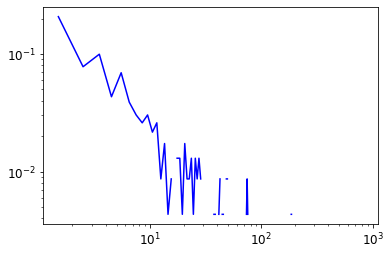

In [21]:
powerlaw.plot_pdf(data,linear_bins = True, color = 'b')

In [24]:
fitmin = powerlaw.Fit(data, xmin = 1)
fitmin.power_law.alpha

1.5174113393336914

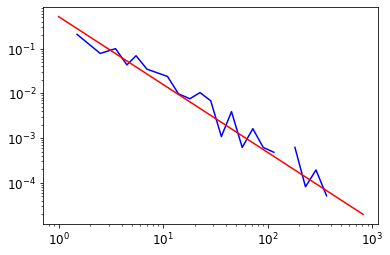

In [30]:
fig2 = fitmin.plot_pdf(color = 'b', )
fitmin.power_law.plot_pdf(color = 'r', ax = fig2)

In [31]:
x, y = fit.cdf()
bin_edges, probability = fit.pdf()


In [65]:
from scipy.optimize import leastsq
from pylab import *

In [89]:
from scipy.optimize import leastsq
from pylab import *
powerlaw = lambda x, amp, alpha: amp * (x**(-alpha))
ydata = Adam_all_verb['count']
xdata = Adam_all_verb['rank']
yerr = 0.2 * ydata

In [152]:
Adam_all_verb['rank']

0        1
1        2
2        3
3        4
4        5
      ... 
226    227
227    228
228    229
229    230
230    231
Name: rank, Length: 231, dtype: int64

In [272]:
testadam = pd.read_csv('Adam_self_verb.csv', sep = ',', header = None)
testadam.columns = ['verb', 'count','rank']
testadam

,verb,count,rank
0,"('go', 'v')",578,1
1,"('put-ZERO', 'v')",344,2
2,"('want', 'v')",338,3
3,"('see', 'v')",267,4
4,"('get', 'v')",195,5
...,...,...,...
289,"('man', 'v')",1,290
290,"('ouch', 'v')",1,291
291,"('snack-3S', 'v')",1,292
292,"('ball-3S', 'v')",1,293


In [273]:
Powerlawfit(testadam).plf()

(-0.6745848276189192, 4898.036550877035)

In [87]:
class Powerlawfit:
    def __init__(self, data):
        self.data = data
    def x(self):
        xdata = self.data['rank']
        return xdata
    def y(self):
        ydata = self.data['count']
        return ydata
    def yerr(self):
        ydata = self.data['count']
        yerr = 0.2*ydata
        return yerr
    def plf(self):
        powerlaw = lambda x, amp, s: amp*(x**(-s))
        ydata = self.data['count']
        xdata = self.data['rank']
        yerr = 0.2 * ydata
        logx = np.log10(xdata)
        logy = np.log10(ydata)
        logyerr = yerr / ydata
        fitfunc = lambda p, x: p[0] +  x/p[1]
        errfunc = lambda p, x, y, err: (y-fitfunc(p,x))/err
        pinit = [1.0, -1.0]
        out = optimize.leastsq(errfunc, pinit, args=(logx, logy, logyerr), full_output=1)
        pfinal = out[0]
        covar = out[1]
        s = pfinal[1]
        amp = 10.0**pfinal[0]
        sErr = np.sqrt(covar[1][1])
        ampErr = np.sqrt(covar[0][0]) * amp
        return s,amp

In [214]:
A_a_c = Powerlawfit(Adam_all_verb)
A_a_c.plf()

(-0.6418309837343803, 7177.659320518249)

0        1
1        2
2        3
3        4
4        5
      ... 
226    227
227    228
228    229
229    230
230    231
Name: rank, Length: 231, dtype: int64

In [90]:
from scipy import optimize

from scipy.optimize import leastsq
from pylab import *
powerlaw = lambda x, amp, alpha: amp*(x**(-alpha))
ydata = Adam_all_verb['count']
xdata = Adam_all_verb['rank']
yerr = 0.2 * ydata
logx = np.log10(xdata)
logy = np.log10(ydata)
logyerr = yerr / ydata

fitfunc = lambda p, x: p[0] +  x/p[1]
errfun = lambda p,x,y,err: (y-fitfunc(p,x))/err
pinit = [1.0, -1.0]
out = optimize.leastsq(errfunc, pinit, args=(logx, logy,logyerr), full_output=1)
pfinal = out[0]
covar = out[1]
print (pfinal)
print (covar)

alpha = pfinal[1]
amp = 10.0**pfinal[0]

alphaErr = np.sqrt(covar[1][1])
ampErr = np.sqrt(covar[0][0]) * amp

[ 3.85598284 -0.64183098]
[[0.00393378 0.00080013]
 [0.00080013 0.00017024]]


In [211]:
10**1.00341313

10.078899854341588

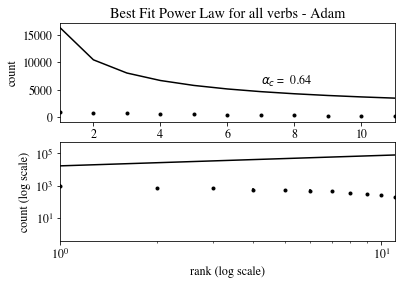

In [100]:
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Times']

plt.clf()
plt.subplot(2, 1, 1)
plt.plot(xdata, powerlaw(xdata, amp, -alpha),color = 'black')     # Fit
plt.errorbar(xdata, ydata, yerr=yerr, fmt='k.')  # Data
plt.text(7, 6000, '$\alpha_c$ = %5.2f' % (-alpha))
plt.title('Best Fit Power Law for all verbs - Adam')
plt.xlabel('rank')
plt.ylabel('count')
plt.xlim(1, 11)

plt.subplot(2, 1, 2)
plt.loglog(xdata, powerlaw(xdata, amp, alpha), color = 'black')
plt.errorbar(xdata, ydata, yerr=yerr, fmt='k.')  # Data
plt.xlabel('rank (log scale)')
plt.ylabel('count (log scale)')
plt.xlim(1.0, 11)
plt.savefig('Best Fit Power Law for all verbs - Adam.png', bbox_inches='tight')

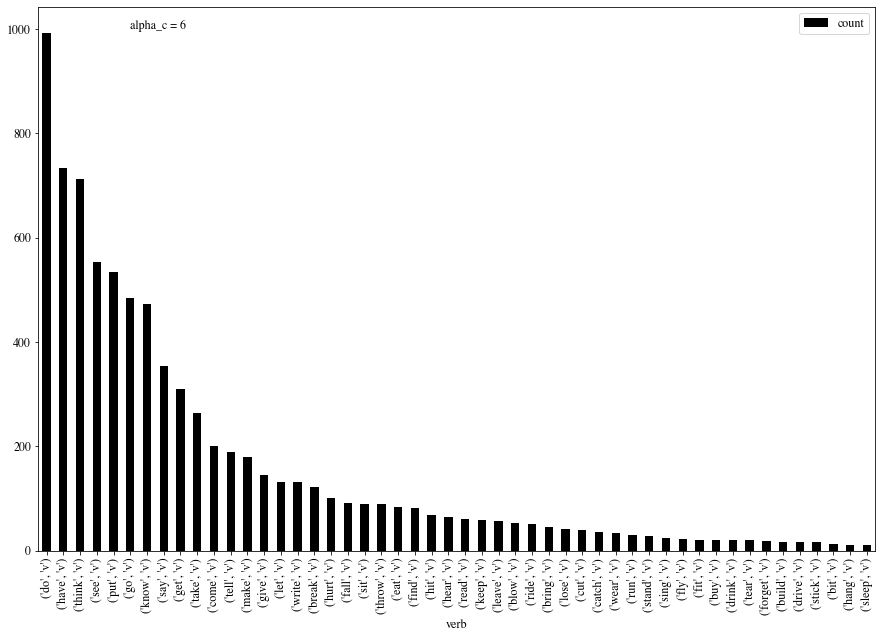

In [231]:
import matplotlib.pyplot as plt
from scipy import stats
import itertools

Adam_all_irr_verb = pd.read_csv('Adam_irr_count.csv', sep = '\t', header = None)
Adam_all_irr_verb.columns = ['verb', 'count','rank']
Adam_all_irr_verb[0:50].plot(x = 'verb', y = 'count',kind='bar',figsize = (15,10), legend = True,color="black")
plt.text(5,1000, '{} = {}'.format('alpha_c', 6))
plt.rcParams.update({'font.size': 12})
#plt.savefig('Adam_all_irr_verb.jpg')
plt.show()

In [263]:
A_b_c = Powerlawfit(Adam_all_irr_verb)
print('Adam beta_c is ', str(round(A_b_c.plf()[0],2)))

Adam beta_c is  -0.51


In [95]:
from scipy import optimize

from scipy.optimize import leastsq
from pylab import *
powerlaw = lambda x, amp, beta: amp/(x**(beta))
ydata = Adam_all_irr_verb['count']
xdata = Adam_all_irr_verb['rank']
yerr = 0.2 * ydata
logx = np.log10(xdata)
logy = np.log10(ydata)
logyerr = yerr / ydata

fitfunc = lambda p, x: p[0] +  x/p[1]
errfun = lambda p,x,y,err: (y-fitfunc(p,x))/err
pinit = [1.0, -1.0]
out = optimize.leastsq(errfunc, pinit, args=(logx, logy,logyerr), full_output=1)
pfinal = out[0]
covar = out[1]
print (pfinal)
print (covar)

beta = pfinal[1]
amp = 10.0**pfinal[0]

betaErr = np.sqrt(covar[1][1])
ampErr = np.sqrt(covar[0][0]) * amp

[ 4.21189416 -0.51392567]
[[0.00771745 0.0012936 ]
 [0.0012936  0.00023248]]


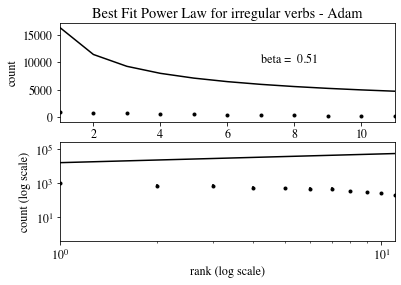

In [97]:
plt.clf()
plt.subplot(2, 1, 1)
plt.plot(xdata, powerlaw(xdata, amp, -beta),color = 'black')     # Fit
plt.errorbar(xdata, ydata, yerr=yerr, fmt='k.')  # Data
plt.text(7, 10000, 'beta = %5.2f' % (-beta))
plt.title('Best Fit Power Law for irregular verbs - Adam')
plt.xlabel('rank')
plt.ylabel('count')
plt.xlim(1, 11)

plt.subplot(2, 1, 2)
plt.loglog(xdata, powerlaw(xdata, amp, beta), color = 'black')
plt.errorbar(xdata, ydata, yerr=yerr, fmt='k.')  # Data
plt.xlabel('rank (log scale)')
plt.ylabel('count (log scale)')
plt.xlim(1.0, 11)
plt.savefig('Best Fit Power Law for irregular verbs - Adam.png', bbox_inches='tight')

# Calculate Difference bar chart

In [336]:
def plf(xdata, ydata):
    powerlaw = lambda x, amp, s: amp/(x**(s))
    logx = np.log10(xdata)
    logy = np.log10(ydata)
    fitfunc = lambda p, x: p[0] - p[1]*x
    errfunc = lambda p, x, y: y-fitfunc(p,x)
    pinit = [-1,1]
    out = optimize.leastsq(errfunc, pinit, args=(logx, logy), full_output=1)
    pfinal = out[0]
    s = pfinal[1]
    amp = 10.0**pfinal[0]
    return amp,s

In [328]:
def new_y(xdata,ydata,amp,s):
    num = len(xdata)
    nyl = []
    for i in range(1,num):
        y = amp/(i**(s))
        nyl.append(y)
    return nyl

In [330]:
data = pd.read_csv('8x4.csv')
data['Adam'].dropna()

0      813.0
1      374.0
2      288.0
3      278.0
4      244.0
       ...  
301      1.0
302      1.0
303      1.0
304      1.0
305      1.0
Name: Adam, Length: 306, dtype: float64

In [445]:
def dodata(d):
    df1 = pd.read_csv(d)['count']
    N = len(df1)
    y = list(df1)
    x = list(range(1,len(y)+1))
    s = plf(x,y)[1]
    amp = plf(x,y)[0]
    return N,s,amp 
def Hea(e,a):
    total = 0.0
    for i in range (1,e+1):
        total +=1.0/i**a
    return total  
def TR(e,b,N): 
    TRR = (Hea(e,b-1)/Hea(e,b)) * (e/N) + (1-(e/N))* e 
    return(TRR)
def TN (u,a):
    TNN =  Hea(u, a-1)/Hea(u, a)
    return(TNN)

In [449]:
new_Adam = list(itertools.chain(*[dodata('Adam.csv')[:2], dodata('Adamir.csv')[:2], dodata('Adam_mot.csv')[:2], dodata('Adamirmot.csv')[:2]]))
new_Eve = list(itertools.chain(*[dodata('Eve.csv')[:2], dodata('Eveir.csv')[:2], dodata('Eve_mot.csv')[:2], dodata('Eveirmot.csv')[:2]]))
new_Sarah = list(itertools.chain(*[dodata('Sarah.csv')[:2], dodata('Sarahir.csv')[:2], dodata('Sarah_mot.csv')[:2], dodata('Sarahirmot.csv')[:2]]))
new_Peter = list(itertools.chain(*[dodata('Peter.csv')[:2], dodata('Peterir.csv')[:2], dodata('Peter_mot.csv')[:2], dodata('Peterirmot.csv')[:2]]))
new_Naomi = list(itertools.chain(*[dodata('Naomi.csv')[:2], dodata('Naomiir.csv')[:2], dodata('Naomi_mot.csv')[:2], dodata('Naomiirmot.csv')[:2]]))
new_Allison = list(itertools.chain(*[dodata('Allison.csv')[:2], dodata('Allisonir.csv')[:2], dodata('Allison_mot.csv')[:2], dodata('Allisonirmot.csv')[:2]]))
new_April = list(itertools.chain(*[dodata('April.csv')[:2], dodata('Aprilir.csv')[:2], dodata('April_mot.csv')[:2], dodata('Aprilirmot.csv')[:2]]))
new_Fraser = list(itertools.chain(*[dodata('Fraser.csv')[:2], dodata('Fraserir.csv')[:2], dodata('Fraser_mot.csv')[:2], dodata('Fraserirmot.csv')[:2]]))

In [442]:
new_Adam = list(itertools.chain(*[dodata('Adam')[:2], dodata('Adam_ir')[:2], dodata('Adam_mother')[:2], dodata('Adam_mother_ir')[:2]]))
new_Eve = list(itertools.chain(*[dodata('Eve')[:2], dodata('Eve_ir')[:2], dodata('Eve_mother')[:2], dodata('Eve_mother_ir')[:2]]))
new_Sarah = list(itertools.chain(*[dodata('Sarah')[:2], dodata('Sarah_ir')[:2], dodata('Sarah_mother')[:2], dodata('Sarah_mother_ir')[:2]]))
new_Peter = list(itertools.chain(*[dodata('Peter')[:2], dodata('Peter_ir')[:2], dodata('Peter_mother')[:2], dodata('Peter_mother_ir')[:2]]))
new_Naomi = list(itertools.chain(*[dodata('Naomi')[:2], dodata('Naomi_ir')[:2], dodata('Naomi_mother')[:2], dodata('Naomi_mother_ir')[:2]]))
new_Allison = list(itertools.chain(*[dodata('Allison')[:2], dodata('Allison_ir')[:2], dodata('Allison_mother')[:2], dodata('Allison_mother_ir')[:2]]))
new_April = list(itertools.chain(*[dodata('April')[:2], dodata('April_ir')[:2], dodata('April_mother')[:2], dodata('April_mother_ir')[:2]]))
new_Fraser = list(itertools.chain(*[dodata('Fraser')[:2], dodata('Fraser_ir')[:2], dodata('Fraser_mother')[:2], dodata('Fraser_mother_ir')[:2]]))

In [469]:
newlst = [new_Adam, new_Eve, new_Sarah, new_Peter, new_Naomi, new_Allison, new_April, new_Fraser]

In [475]:
pd.DataFrame(newlst).to_csv('Table2.csv')

In [450]:
new_Fraser

[371,
 1.6741021370872025,
 73,
 1.998756105028705,
 581,
 1.801144931447833,
 89,
 2.161413183075455]

In [443]:
new_Fraser

[371,
 1.6741021370872025,
 78,
 2.043139695897736,
 581,
 1.801144931447833,
 97,
 2.2590182594876316]

In [391]:
new_Adam

[306,
 1.5178719221541068,
 62,
 1.6469288475213137,
 297,
 1.451759590710213,
 70,
 1.5600554256284254]

In [451]:
new_Adam

[306,
 1.5178719221541068,
 64,
 1.568921799461834,
 297,
 1.451759590710213,
 71,
 1.5195878421606503]

In [468]:
lst = [['Tn','Tr','Tr<Tn','Tn','Tr','Tr<Tn'],aaaddd,eeevvv,sssaaa,pppeee,nnnaaa,aaalll,aaappp,fffrrr]
pd.DataFrame(lst).to_csv('PowerLawProb.csv')

In [411]:
eeevvv= [Eve_Tn,Eve_Tr,'False',Eve_mTn,Eve_mTr,'False']
sssaaa= [Sarah_Tn,Sarah_Tr,'False',Sarah_mTn,Sarah_mTr,'False']
pppeee= [Peter_Tn,Peter_Tr,'False',Peter_mTn,Peter_mTr,'False']
nnnaaa= [Naomi_Tn,Naomi_Tr,'False',Naomi_mTn,Naomi_mTr,'False']
aaalll= [Allison_Tn,Allison_Tr,'False',Allison_mTn,Allison_mTr,'False']
aaappp=     [April_Tn,April_Tr,'False',April_mTn,April_mTr,'False']
fffrrr=      [Fraser_Tn,Fraser_Tr,'False',Fraser_mTn,Fraser_mTr,'False']

In [452]:
Adam_Tn = TN(new_Adam[0],new_Adam[1])
Adam_Tr = TR(new_Adam[2],new_Adam[3],new_Adam[0])
print(Adam_Tn,Adam_Tr,Adam_Tn>Adam_Tr)

12.780144900589395 51.76919128767086 False


In [409]:
aaaddd = [Adam_Tn,Adam_Tr,Adam_Tn>Adam_Tr,Adam_mTn,Adam_mTr,Adam_mTn>Adam_mTr]
aaaddd

[12.780144900589395,
 50.412358753805975,
 False,
 15.118583086485057,
 54.876703283225496,
 False]

In [405]:
type(float(Adam_Tn))

float

In [470]:
def yang(new):
    Tn = new[0]/ln(new[0])
    Tr = (new[2]/new[0]) * (new[2]/ln(new[2])) + (1-new[2]/new[0])*new[2]
    Tnm = new[4]/ln(new[4])
    Trm = (new[6]/new[4]) * (new[6]/ln(new[6])) + (1-new[6]/new[4])*new[6]
    pe = [Tn, Tr, Tnm, Trm]
    return pe 

In [473]:
yanlst = []
for i in newlst:
    yanlst.append(yang(i))
yanlst

[[53.462994705122824,
  53.832940570523526,
  52.16262246970654,
  58.00871848835905],
 [20.518027269005717,
  27.109352230566593,
  28.007488312548105,
  38.166762332232715],
 [36.05668099910188, 41.88097699652658, 51.582939492872654, 58.44422920669589],
 [70.08573239426184, 58.93069973115293, 98.132377729683, 72.99371230880674],
 [26.380709319112476,
  31.905873637837587,
  33.727105043144554,
  42.94598269908458],
 [19.654541002016533,
  26.433747243666975,
  28.330661757205146,
  34.83340333492785],
 [12.781110931766573,
  15.794268702602217,
  21.71472409516259,
  28.33736049090907],
 [62.7091495648629, 61.983984158853495, 91.28401444071162, 78.40392164994174]]

In [453]:
Adam_mTn = TN(new_Adam[4],new_Adam[5])
Adam_mTr = TR(new_Adam[6],new_Adam[7],new_Adam[4])
print(Adam_mTn,Adam_mTr,Adam_mTn>Adam_mTr)

15.118583086485057 55.53054410194167 False


In [454]:
Eve_Tn = TN(new_Eve[0],new_Eve[1])
Eve_Tr = TR(new_Eve[2],new_Eve[3],new_Eve[0])
print(Eve_Tn,Eve_Tr,Eve_Tn>Eve_Tr)

13.163241400375684 24.891817922822813 False


In [455]:
Eve_mTn = TN(new_Eve[4],new_Eve[5])
Eve_mTr = TR(new_Eve[6],new_Eve[7],new_Eve[4])
print(Eve_mTn,Eve_mTr,Eve_mTn>Eve_mTr)

12.254423971003737 35.06488562641761 False


In [456]:
Sarah_Tn = TN(new_Sarah[0],new_Sarah[1])
Sarah_Tr = TR(new_Sarah[2],new_Sarah[3],new_Sarah[0])
print(Sarah_Tn,Sarah_Tr,Sarah_Tn>Sarah_Tr)

17.015842635850106 39.62925285790122 False


In [457]:
Sarah_mTn = TN(new_Sarah[4],new_Sarah[5])
Sarah_mTr = TR(new_Sarah[6],new_Sarah[7],new_Sarah[4])
print(Sarah_mTn,Sarah_mTr,Sarah_mTn>Sarah_mTr)

16.98841780418012 55.439569993250736 False


In [458]:
Peter_Tn = TN(new_Peter[0],new_Peter[1])
Peter_Tr = TR(new_Peter[2],new_Peter[3],new_Peter[0])
print(Peter_Tn,Peter_Tr,Peter_Tn>Peter_Tr)

17.977638189773977 56.964367376896504 False


In [459]:
Peter_mTn = TN(new_Peter[4],new_Peter[5])
Peter_mTr = TR(new_Peter[6],new_Peter[7],new_Peter[4])
print(Peter_mTn,Peter_mTr,Peter_mTn>Peter_mTr)

15.381593198117894 71.06983737443096 False


In [460]:
Naomi_Tn = TN(new_Naomi[0],new_Naomi[1])
Naomi_Tr = TR(new_Naomi[2],new_Naomi[3],new_Naomi[0])
print(Naomi_Tn,Naomi_Tr,Naomi_Tn>Naomi_Tr)

12.888502409687527 29.91251965795803 False


In [461]:
Naomi_mTn = TN(new_Naomi[4],new_Naomi[5])
Naomi_mTr = TR(new_Naomi[6],new_Naomi[7],new_Naomi[4])
print(Naomi_mTn,Naomi_mTr,Naomi_mTn>Naomi_mTr)

18.748967249132722 40.39917746935731 False


In [462]:
Allison_Tn = TN(new_Allison[0],new_Allison[1])
Allison_Tr = TR(new_Allison[2],new_Allison[3],new_Allison[0])
print(Allison_Tn,Allison_Tr,Allison_Tn>Allison_Tr)

13.720041969564743 24.684695825157448 False


In [463]:
Allison_mTn = TN(new_Allison[4],new_Allison[5])
Allison_mTr = TR(new_Allison[6],new_Allison[7],new_Allison[4])
print(Allison_mTn,Allison_mTr,Allison_mTn>Allison_mTr)

14.100455948537856 32.46599621174659 False


In [464]:
April_Tn = TN(new_April[0],new_April[1])
April_Tr = TR(new_April[2],new_April[3],new_April[0])
print(April_Tn,April_Tr,April_Tn>April_Tr)

13.925484251111069 15.438116689227886 False


In [465]:
April_mTn = TN(new_April[4],new_April[5])
April_mTr = TR(new_April[6],new_April[7],new_April[4])
print(April_mTn,April_mTr,April_mTn>April_mTr)

14.02243362446943 26.81476828129219 False


In [466]:
Fraser_Tn = TN(new_Fraser[0],new_Fraser[1])
Fraser_Tr = TR(new_Fraser[2],new_Fraser[3],new_Fraser[0])
print(Fraser_Tn,Fraser_Tr,Fraser_Tn>Fraser_Tr)

8.93909049738455 59.22505352262107 False


In [467]:
Fraser_mTn = TN(new_Fraser[4],new_Fraser[5])
Fraser_mTr = TR(new_Fraser[6],new_Fraser[7],new_Fraser[4])
print(Fraser_mTn,Fraser_mTr,Fraser_mTn>Fraser_mTr)

7.136552550676155 75.7502582230258 False


In [309]:
new_y(x,y,amp,-s)

[7195.187423169669,
 2512.563982220994,
 1357.7917018719183,
 877.3889258847391,
 625.3096916674122,
 474.14171790664153,
 375.2247837225919,
 306.3847658059229,
 256.226585527926,
 218.3585383694051,
 188.94760160019212,
 165.5705866735867,
 146.62862507189868,
 131.02873092397212,
 118.00113888792568,
 106.98975328790729,
 97.58391303162819,
 89.47448512763403,
 82.42480182350691,
 76.25093919731391,
 70.80803705468766,
 65.98062154419154,
 61.67563777059746,
 57.81735320078588,
 54.343575434056305,
 51.202808273191984,
 48.35208746731064,
 45.755315406456674,
 43.38196662940846,
 41.206072058127084,
 39.20541495301895,
 37.36088926777176,
 35.65598370866682,
 34.07636392318521,
 32.60953190183668,
 31.24454658895131,
 29.97179335572651,
 28.782792736789453,
 27.670040913514924,
 26.62687601726093,
 25.647365548944645,
 24.72621115920895,
 23.858667772772613,
 23.04047462094594,
 22.267796204658097,
 21.5371715744197,
 20.84547060441365,
 20.189856171341976,
 19.567751336996107,
 18.

In [348]:
new_Adam

[306,
 1.5178719221541068,
 62,
 1.6469288475213137,
 297,
 1.451759590710213,
 70,
 1.5600554256284254]

In [320]:
y = list(fraserr_v)
x = list(range(1,len(y)+1))
amp = plf(x,y)[0]
s = plf(x,y)[1]
print(amp, s)

20782.38714404801 1.6741021466353856


In [321]:
10**4.31770

20782.60579597861

In [316]:
new_y(x,y,amp,s)

[20782.386061698082,
 6512.390726551461,
 3303.2823446441644,
 2040.7297241695132,
 1404.585660527327,
 1035.1200889338163,
 799.6776783651268,
 639.4852492694748,
 525.0443436111531,
 440.14246502347595,
 375.2301169553436,
 324.3663383033559,
 283.68767097012227,
 250.58785268228894,
 223.25362449653085,
 200.38978174812615,
 181.04987932898482,
 164.52845713723545,
 150.29041109704556,
 137.92351364616025,
 127.10576872681393,
 117.58251082085495,
 109.15004728327992,
 101.64378273510088,
 94.92946921022548,
 88.89667202688142,
 83.45382985654605,
 78.5244775623825,
 74.0443278445175,
 69.95899457953837,
 66.22220079955999,
 62.79435635917245,
 59.64142023142049,
 56.73398384983147,
 54.046527513292936,
 51.55681331938475,
 49.245386575641255,
 47.09516398224559,
 45.091091664200334,
 43.21985976855907,
 41.46966312889054,
 39.82999964923484,
 38.291499730109614,
 36.845781365097274,
 35.48532656393889,
 34.203375571024566,
 32.99383599504261,
 31.851204482994603,
 30.77049898779469

### Adam himself: 
U_c = 270, e_c = 62, a_c = 0.66, b_c = 0.61

TR = Hea(e,b-1)/Hea(e,b) x (e/N) + 1-(e/N)x e 

TN = Hea(u, a-1)/Hea(u, a)


In [445]:
AU_c = 270
Ae_c = 62
Aa_c = 0.66
Ab_c = 0.61
TR =  Hea(62, 0.61-1)/Hea(62,0.61)*(62/270) + (1-62/270)*62
TN = Hea(270,0.66-1)/Hea(270,0.66)
print(TR, TN, TR<TN)

52.5328117912004 78.06696947934688 True


In [430]:
##vanilla version
from numpy import log as ln
Tnnn = 306/ln(306)
Trrr =  (64/306) * (64/ln(64)) + (1-64/306)*64
print(Tnnn, Trrr, Trrr<Tnnn)

53.462994705122824 53.832940570523526 False


### Adam mother:
U_p = 275, e_p = 70, a_p = 0.69, b_p = 0.64

In [5]:
def TR(e,b,N): 
    TRR = (Hea(e,b-1)/Hea(e,b)) * (e/N) + (1-(e/N))* e 
    return(TRR)
def TN (u, a):
    TNN = TN = Hea(u, a-1)/Hea(u, a)
    return(TNN)
T_r = TR(70,0.64,275)
T_n = TN(275,0.69)
print(T_r, T_n, T_r<T_n)

57.921361830209186 76.24252841356875 True


In [427]:
##vanilla version
Tnnn = 275/ln(275)
Trrr =  (70/275) * (70/ln(70)) + (1-70/275)*70
print(Tnnn, Trrr, Trrr<Tnnn)

48.96051400674773 56.375816480751624 False


### Eve herself
U_c = 91 e_c = 36 a_c = 0.84 b_c = 0.73

In [455]:
T_r = TR(36, 0.73, 91)
T_n = TN(91, 0.84)
print(T_r, T_n, T_r<T_n)

26.265076202354848 22.547658579783214 False


In [428]:
##vanilla version
Tnnn = 93/ln(93)
Trrr =  (36/93) * (36/ln(36)) + (1-36/93)*36
print(Trrr, Tnnn, Trrr<Tnnn)

25.953286946292565 20.518027269005717 False


In [477]:
def Nrange(X):
    k = (Hea(36,0.73-1)/Hea(36,0.73)) * 36/X + (1-36/X)*36 - (Hea(X,0.84-1)/Hea(X,0.84))
    return k

In [502]:
Nrange(120)

-0.11596567798251556

In [12]:
def erange(X,e,b,a):
    k = (Hea(e,b-1)/Hea(e,b)) * e/X + (1-e/X)*e - (Hea(X,a-1)/Hea(X,a))
    return k
erange(91,28,0.73,0.84)

-0.33764298708092255

In [32]:
def erange(X,e,b,a):
    k = (Hea(e,b-1)/Hea(e,b)) * e/X + (1-e/X)*e - (Hea(X,a-1)/Hea(X,a))
    return k
erange(91,36,1,1)

7.304103104290682

### Eve's mother
e = 50, b = 0.65, N = 136, a = 0.74

In [456]:
T_r = TR(50, 0.65, 136)
T_n = TN(136, 0.74)
print(T_r, T_n, T_r<T_n)

37.65766519218086 36.93997158325466 False


In [157]:
##vanilla version
Tnnn = 136/ln(136)
Trrr =  (50/136) * (50/ln(50)) + (1-50/136)*50
print(Trrr, Tnnn, Trrr<Tnnn)

36.31658490138477 27.683605537787216 False


In [496]:
def Nmrange(X):
    k = (Hea(50,0.65-1)/Hea(50,0.65)) * 50/X + (1-50/X)*50 - (Hea(X,0.74-1)/Hea(X,0.74))
    return k

In [503]:
Nmrange(141)

-0.08802219957497215

In [15]:
def erange(X,e,b,a):
    k = (Hea(e,b-1)/Hea(e,b)) * e/X + (1-e/X)*e - (Hea(X,a-1)/Hea(X,a))
    return k
erange(136,48,0.65,0.74)

-0.29247925817759324

In [33]:
erange(136,50,1,1)

10.946997028262466

### Sarah herself
u,a,e ,b = 189, 0.77, 48, 0.62

In [114]:
def TR(e,b,N): 
    TRR = (Hea(e,b-1)/Hea(e,b)) * (e/N) + (1-(e/N))* e 
    return(TRR)
def TN (u, a):
    TNN = TN = Hea(u, a-1)/Hea(u, a)
    return(TNN)
T_r = TR(48,0.62,189)
T_n = TN(189,0.77)
print(T_r, T_n, T_r<T_n)

39.944236028703386 47.903456770884496 True


In [156]:
##vanilla version
Tnnn = 189/ln(189)
Trrr =  (48/189) * (48/ln(48)) + (1-48/189)*48
print(Trrr, Tnnn, Trrr<Tnnn)

38.95854039536553 36.05668099910188 False


### Sarah mother
u,a,e,b = 293, 0.71, 68, 0.58

In [122]:
T_r = TR(68, 0.58,293)
T_n = TN(293, 0.71)
print(T_r, T_n, T_r<T_n)

57.62228145289005 78.66559169371367 True


In [155]:
##vanilla version
Tnnn = 293/ln(293)
Trrr =  (68/293) * (68/ln(68)) + (1-68/293)*68
print(Trrr, Tnnn, Trrr<Tnnn)

55.958574872948425 51.582939492872654 False


### Peter himself
u,a,e,b = 424，0.69，67，0.54

In [123]:
T_r = TR(67,0.54,424)
T_n = TN(424, 0.69)
print(T_r, T_n, T_r<T_n)

60.17795807534998 115.04014951144455 True


In [154]:
##vanilla version
Tnnn = 424/ln(424)
Trrr =  (67/424) * (67/ln(67)) + (1-67/424)*67
print(Trrr, Tnnn, Trrr<Tnnn)

58.93069973115293 70.08573239426184 True


### Peter's mother
u,a,e,b = 633, 0.64, 83,0.51

In [135]:
T_r = TR(83,0.51,633)
T_n = TN(633, 0.64)
print(T_r, T_n, T_r<T_n)

76.04634336196683 181.9875777588656 True


In [153]:
##vanilla version
Tnnn = 633/ln(633)
Trrr =  (83/633) * (83/ln(83)) + (1-83/633)*83
print(Trrr, Tnnn, Trrr<Tnnn)

74.57978865978228 98.132377729683 True


### Naomi herself
u,a,e,b = 128, 0.76, 43, 0.66

In [136]:
T_r = TR(43, 0.66,123)
T_n = TN(128, 0.76)
print(T_r, T_n, T_r<T_n)

32.936118390469936 34.03289944935725 True


In [152]:
##vanilla version
Tnnn = 128/ln(128)
Trrr =  (43/128) * (43/ln(43)) + (1-43/128)*43
print(Trrr, Tnnn, Trrr<Tnnn)

32.39530008525626 26.380709319112476 False


### Naomi's mother
u,a,e,b = 222 , 0.77,62 , 0.63

In [141]:
T_r = TR(62,0.63,222)
T_n = TN(222, 0.77)
print(T_r, T_n, T_r<T_n)

50.37439853896333 55.54177822208273 True


In [151]:
##vanilla version
Tnnn = 222/ln(222)
Trrr =  (62/222) * (62/ln(62)) + (1-62/222)*62
print(Trrr, Tnnn, Trrr<Tnnn)

48.88016602836429 41.09073785247319 False


### Allison herself
u,a,e,b = 88,0.87,36,0.84

In [142]:
T_r = TR(36,0.84,88)
T_n = TN(88,0.87)
print(T_r, T_n, T_r<T_n)

25.460534316864166 21.02591158245699 False


In [150]:
##vanilla version
Tnnn = 88/ln(88)
Trrr =  (36/88) * (36/ln(36)) + (1-36/88)*36
print(Trrr, Tnnn, Trrr<Tnnn)

25.38245097733191 19.654541002016533 False


In [153]:
def Nrange(X):
    k = (Hea(36,0.84-1)/Hea(36,0.84)) * 36/X + (1-36/X)*36 - (Hea(X,0.84-1)/Hea(X,0.84))
    return k
Nrange(117)

-0.027113890155650466

In [19]:
def erange(X,e,b,a):
    k = (Hea(e,b-1)/Hea(e,b)) * e/X + (1-e/X)*e - (Hea(X,a-1)/Hea(X,a))
    return k
erange(88,26,0.84,0.87)

-0.39103162168239436

In [34]:
erange(88,36,1,1)

7.410054141295621

### Allison mother
u,a,e,b = 140 , 0.77, 44 , 0.68

In [143]:
T_r = TR(44 , 0.68,140)
T_n = TN(140 , 0.77)
print(T_r, T_n, T_r<T_n)

34.646518729905544 36.421788623831354 True


In [149]:
##vanilla version
Tnnn = 140/ln(140)
Trrr =  (44/140) * (44/ln(44)) + (1-44/140)*44
print(Trrr, Tnnn, Trrr<Tnnn)

33.82573048712113 28.330661757205146 False


### April herself
u,a,e,b = 50 , 1.23,19, 1.23

In [144]:
T_r = TR(19, 1.23,50)
T_n = TN(50 , 1.23)
print(T_r, T_n, T_r<T_n)

13.44187715356977 8.129035419746918 False


In [148]:
##vanilla version
Tnnn = 50/ln(50)
Trrr =  (19/50) * (19/ln(19)) + (1-19/50)*19
print(Trrr, Tnnn, Trrr<Tnnn)

14.232080023082684 12.781110931766573 False


In [163]:
def Nrange(X):
    k = (Hea(19,1.23-1)/Hea(19,1.23)) * 19/X + (1-19/X)*19 - (Hea(X,1.23-1)/Hea(X,1.23))
    return k
Nrange(152)

-0.049838003037312006

In [23]:
def erange(X,e,b,a):
    k = (Hea(e,b-1)/Hea(e,b)) * e/X + (1-e/X)*e - (Hea(X,a-1)/Hea(X,a))
    return k
erange(50,9,1.23,1.23)

-0.24596083259701373

In [31]:
def erange(X,e,b,a):
    k = (Hea(e,b-1)/Hea(e,b)) * e/X + (1-e/X)*e - (Hea(X,a-1)/Hea(X,a))
    return k
erange(50,19,1,1)

2.7020250120964686

# April's mother
u,a,e,b = 100, 0.84, 37, 0.8

In [145]:
T_r = TR(37, 0.8,100)
T_n = TN(100,0.84)
print(T_r, T_n, T_r<T_n)

27.34424738887705 24.482956603882595 False


In [147]:
##vanilla version
Tnnn = 100/ln(100)
Trrr =  (37/100) * (37/ln(37)) + (1-37/100)*37
print(Trrr, Tnnn, Trrr<Tnnn)

27.101279760767255 21.71472409516259 False


In [167]:
def Nrange(X):
    k = (Hea(37,0.8-1)/Hea(37,0.8)) * 37/X + (1-37/X)*37 - (Hea(X,0.8-1)/Hea(X,0.8))
    return k
Nrange(111)

-0.05966325637790604

In [27]:
def erange(X,e,b,a):
    k = (Hea(e,b-1)/Hea(e,b)) * e/X + (1-e/X)*e - (Hea(X,a-1)/Hea(X,a))
    return k
erange(100,31,0.8,0.84)

-0.17937450853797898

In [51]:
erange(100,100,-1,-1)

0.0

### Fraser himself
e = 78 b = 0.49, N = 358, a = 0.60

In [457]:
T_r = TR(78, 0.49, 358)
T_n = TN(358, 0.60)
print(T_r, T_n, T_r<T_n)

67.27060967065228 110.63767483807273 True


In [146]:
##vanilla version
Tnnn = 358/ln(358)
Trrr =  (78/358) * (78/ln(78)) + (1-78/358)*78
print(Trrr, Tnnn, Trrr<Tnnn)

64.90633233486231 60.87883544364253 False


### Fraser's mother
e = 97 b = 0.44 N = 566 a =0.56

In [458]:
T_r = TR(97, 0.44, 566)
T_n = TN(566, 0.56)
print(T_r, T_n, T_r<T_n)

86.71472111469369 181.5782089003796 True


In [115]:
T_r = TR(97, 0.44, 566)
T_n = TN(581, 0.56)
print(T_r, T_n, T_r<T_n)

86.71472111469369 186.28192417304453 True


In [145]:
##vanilla version
Tnnn = 581/ln(581)
Trrr =  (97/581) * (97/ln(97)) + (1-97/581)*97
print(Trrr, Tnnn, Trrr<Tnnn)

84.34551110959544 91.28401444071162 True


In [1]:
pip install --upgrade pip

     |████████████████████████████████| 1.4MB 1.1MB/s eta 0:00:01
  Found existing installation: pip 19.2.3
    Uninstalling pip-19.2.3:
      Successfully uninstalled pip-19.2.3
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tensorflow

     |████████████████████████████████| 120.8 MB 41 kB/s  eta 0:00:01    |██▉                             | 10.9 MB 1.2 MB/s eta 0:01:32     |███████▌                        | 28.5 MB 1.2 MB/s eta 0:01:15     |███████▊                        | 29.3 MB 1.5 MB/s eta 0:01:02     |█████████████                   | 49.2 MB 1.2 MB/s eta 0:00:58     |██████████████▋                 | 55.4 MB 1.1 MB/s eta 0:00:59     |███████████████▌                | 58.5 MB 1.2 MB/s eta 0:00:53     |████████████████▎               | 61.5 MB 1.1 MB/s eta 0:00:56
     |████████████████████████████████| 104 kB 1.2 MB/s eta 0:00:01
     |████████████████████████████████| 57 kB 1.1 MB/s eta 0:00:01
     |████████████████████████████████| 2.3 MB 1.3 MB/s eta 0:00:01
     |████████████████████████████████| 41 kB 513 kB/s eta 0:00:01
     |████████████████████████████████| 69 kB 1.5 MB/s eta 0:00:011
     |████████████████████████████████| 448 kB 1.1 MB/s eta 0:00:01
     |████████████████████████████████| 1.3 MB 76

Note: you may need to restart the kernel to use updated packages.


# Make Fraser Less DENSE

In [183]:
randint(1, 90, 3)

array([88, 15, 22, 25])

In [205]:
Fraser3 = [Fraser.fileids()[i] for i in randint(1, 90, 3)]
Fraser3

['Fraser/020303b.xml', 'Fraser/020500a.xml', 'Fraser/020402a.xml']

In [235]:
for k in Fraser3:
    sents = Fraser.sents(k, speaker = ['CHI'])
    words = Fraser.words(k, speaker = ['CHI'])
    words_mot = Fraser.words(k, speaker = ['MOT'])
print(len(sents), len(words), len(words_mot))

756 1616 3304


In [198]:
Fraser3_verb = []
Fraser3_mot_verb = []
for k in Fraser3:
    for i in Fraser.tagged_words(k, speaker = ['CHI']):
        if i[1] == 'v' or i[1] == 'part':
            Fraser3_verb.append(i)
    for i in Fraser.tagged_words(k, speaker = ['MOT']):
        if i[1] == 'v' or i[1] == 'part':
            Fraser3_mot_verb.append(i)

In [199]:
print('Fraser 3 files:', 'total verbs: ', len(Fraser3_verb), 'total mother verbs:', len(Fraser3_mot_verb))

Fraser 3 files: total verbs:  577 total mother verbs: 1362


In [211]:
get_rank(Fraser3_verb, 'Fraser3')

/Users/Ershui13/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  if sys.path[0] == '':


,verb,count
0,go,153
1,get,57
2,make,42
3,know,24
4,do,21
...,...,...
79,let,1
80,push,1
81,amaze,1
82,open,1


In [201]:
get_mot_rank(Fraser3_mot_verb, 'Fraser3')

/Users/Ershui13/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  if sys.path[0] == '':


,verb,count
0,go,203
1,do,118
2,get,116
3,have,76
4,know,49
...,...,...
150,dirty,1
151,piece,1
152,pen,1
153,pavilion,1


In [233]:
irrverb(Fraser3_verb,'Fraser3',Fraser3_mot_verb)

/Users/Ershui13/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  if sys.path[0] == '':


Fraser3 Up: 155.0 ap: -0.8 Uc: 84.0 ac: -0.85 ep: 54.0 bp: -0.64 ec: 38.0 bc: -0.7


/Users/Ershui13/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/Users/Ershui13/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [203]:
#Fraser3_himself: 84, 0.85, 38, 0.70
T_r = TR(38, 0.70, 84)
T_n = TN(84, 0.85)
print(T_r, T_n, T_r<T_n)

26.363818208439294 20.754090089466846 False


In [204]:
#Fraser3_mother: 155, 0.80, 54, 0.64
T_r = TR(54, 0.64, 155)
T_n = TN(155, 0.80)
print(T_r, T_n, T_r<T_n)

41.38304953547008 38.270187912842694 False


In [244]:
def Nrange(X):
    k = (Hea(38,0.70-1)/Hea(38,0.70)) * 38/X + (1-38/X)*38 - (Hea(X,0.70-1)/Hea(X,0.70))
    return k
Nrange(94)

-0.07785460435654556

In [255]:
def Nrange(X,e,b,a):
    k = (Hea(e,b-1)/Hea(e,b)) * e/X + (1-e/X)*e - (Hea(X,a-1)/Hea(X,a))
    return k
Nrange(176,54,0.64,0.8)

-0.04256906118164494

### Trying 4 files

In [206]:
Fraser4 = [Fraser.fileids()[i] for i in randint(1, 90, 4)]
Fraser4

['Fraser/020402a.xml',
 'Fraser/020028a.xml',
 'Fraser/020301b.xml',
 'Fraser/020103b.xml']

In [236]:
for k in Fraser4:
    words = Fraser.words(k, speaker = ['CHI'])
    words_mot = Fraser.words(k, speaker = ['MOT'])
print(len(words), len(words_mot))

1148 1495


In [207]:
Fraser4_verb = []
Fraser4_mot_verb = []
for k in Fraser4:
    for i in Fraser.tagged_words(k, speaker = ['CHI']):
        if i[1] == 'v' or i[1] == 'part':
            Fraser4_verb.append(i)
    for i in Fraser.tagged_words(k, speaker = ['MOT']):
        if i[1] == 'v' or i[1] == 'part':
            Fraser4_mot_verb.append(i)
print('Fraser 4 files:', 'total verbs: ', len(Fraser4_verb), 'total mother verbs:', len(Fraser4_mot_verb))

Fraser 4 files: total verbs:  640 total mother verbs: 1160


In [210]:
get_rank(Fraser4_verb, 'Fraser4')

/Users/Ershui13/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  if sys.path[0] == '':


,verb,count
0,go,118
1,come,65
2,do,43
3,get,36
4,want,28
...,...,...
86,pot,1
87,build,1
88,brush,1
89,ride,1


In [212]:
get_mot_rank(Fraser4_mot_verb, 'Fraser4')

/Users/Ershui13/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  if sys.path[0] == '':


,verb,count
0,go,156
1,do,102
2,have,81
3,come,73
4,get,72
...,...,...
126,ring,1
127,roll,1
128,rub,1
129,sauce,1


In [214]:
irrverb(Fraser4_verb,'Fraser4',Fraser4_mot_verb)

Fraser4 Up: 131.0 ap: -0.78 Uc: 91.0 ac: -0.84 ep: 43.0 bp: -0.61 ec: 36.0 bc: -0.67


/Users/Ershui13/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  if sys.path[0] == '':
/Users/Ershui13/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/Users/Ershui13/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

In [215]:
#Fraser4_himself: 91, 0.84, 36, 0.67
T_r = TR(36, 0.67, 91)
T_n = TN(91, 0.84)
print(T_r, T_n, T_r<T_n)

26.51686370119741 22.547658579783214 False


In [258]:
Nrange(121,36,0.67,0.84)

-0.07652612503588685

In [216]:
#Fraser4_mother: 131, 0.78, 43, 0.61
T_r = TR(43, 0.61, 131)
T_n = TN(131, 0.78)
print(T_r, T_n, T_r<T_n)

33.765183835491314 33.82322687502683 True


In [261]:
Nrange(131,43,0.61,0.78)

-0.05804303953551937

### Trying 5 files

In [217]:
Fraser5 = [Fraser.fileids()[i] for i in randint(1, 90, 5)]
Fraser5

['Fraser/020027b.xml',
 'Fraser/020015b.xml',
 'Fraser/020205b.xml',
 'Fraser/020024a.xml',
 'Fraser/020102a.xml']

In [237]:
for k in Fraser5:
    words = Fraser.words(k, speaker = ['CHI'])
    words_mot = Fraser.words(k, speaker = ['MOT'])
print(len(words), len(words_mot))

1485 1866


In [218]:
Fraser5_verb = []
Fraser5_mot_verb = []
for k in Fraser5:
    for i in Fraser.tagged_words(k, speaker = ['CHI']):
        if i[1] == 'v' or i[1] == 'part':
            Fraser5_verb.append(i)
    for i in Fraser.tagged_words(k, speaker = ['MOT']):
        if i[1] == 'v' or i[1] == 'part':
            Fraser5_mot_verb.append(i)
print('Fraser 5 files:', 'total verbs: ', len(Fraser5_verb), 'total mother verbs:', len(Fraser5_mot_verb))

Fraser 5 files: total verbs:  757 total mother verbs: 1339


In [221]:
print('Fraser verb type:', len(get_rank(Fraser5_verb, 'Fraser5')), 
      'Fraser mother verb type:', len(get_mot_rank(Fraser5_mot_verb, 'Fraser5')))

Fraser verb type: 95 Fraser mother verb type: 145


/Users/Ershui13/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  if sys.path[0] == '':


In [222]:
irrverb(Fraser5_verb,'Fraser5',Fraser5_mot_verb)

Fraser5 Up: 145.0 ap: -0.79 Uc: 95.0 ac: -0.8 ep: 53.0 bp: -0.63 ec: 33.0 bc: -0.61


/Users/Ershui13/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  if sys.path[0] == '':
/Users/Ershui13/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/Users/Ershui13/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

In [223]:
#Fraser5_himself: 95, 0.8, 33, 0.61
T_r = TR(33, 0.61, 95)
T_n = TN(95, 0.8)
print(T_r, T_n, T_r<T_n)

25.606587246186283 24.69433027732393 False


In [267]:
Nrange(101,33,0.61,0.8)

-0.028249540963784625

In [224]:
#Fraser5_mother: 145, 0.79, 53, 0.63
T_r = TR(53, 0.63, 145)
T_n = TN(145, 0.79)
print(T_r, T_n, T_r<T_n)

40.07965134241025 36.55759285420203 False


In [272]:
Nrange(169,53,0.63,0.79)

-0.08519892599186107

### Trying 6 files


In [225]:
Fraser6 = [Fraser.fileids()[i] for i in randint(1, 90, 6)]
Fraser6

['Fraser/020028a.xml',
 'Fraser/020406b.xml',
 'Fraser/020002b.xml',
 'Fraser/020030b.xml',
 'Fraser/020100.xml',
 'Fraser/020201a.xml']

In [238]:
for k in Fraser6:
    words = Fraser.words(k, speaker = ['CHI'])
    words_mot = Fraser.words(k, speaker = ['MOT'])
print(len(words), len(words_mot))

1373 3206


In [226]:
Fraser6_verb = []
Fraser6_mot_verb = []
for k in Fraser6:
    for i in Fraser.tagged_words(k, speaker = ['CHI']):
        if i[1] == 'v' or i[1] == 'part':
            Fraser6_verb.append(i)
    for i in Fraser.tagged_words(k, speaker = ['MOT']):
        if i[1] == 'v' or i[1] == 'part':
            Fraser6_mot_verb.append(i)
print('Fraser 6 files:', 'total verbs: ', len(Fraser6_verb), 'total mother verbs:', len(Fraser6_mot_verb))

Fraser 6 files: total verbs:  945 total mother verbs: 1968


In [228]:
get_rank(Fraser6_verb, 'Fraser6')

/Users/Ershui13/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  if sys.path[0] == '':


,verb,count
0,go,162
1,come,80
2,do,57
3,get,48
4,see,41
...,...,...
130,lift,1
131,let,1
132,land,1
133,kiss,1


In [229]:
get_mot_rank(Fraser6_mot_verb, 'Fraser6')

/Users/Ershui13/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  if sys.path[0] == '':


,verb,count
0,go,286
1,do,208
2,come,161
3,get,116
4,see,82
...,...,...
174,squeak,1
175,eye,1
176,start,1
177,hang,1


In [230]:
irrverb(Fraser6_verb,'Fraser6',Fraser6_mot_verb)

Fraser6 Up: 179.0 ap: -0.76 Uc: 135.0 ac: -0.85 ep: 57.0 bp: -0.6 ec: 39.0 bc: -0.71


/Users/Ershui13/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  if sys.path[0] == '':
/Users/Ershui13/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/Users/Ershui13/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

In [231]:
#Fraser6_himself: 135, 0.85, 39, 0.71
T_r = TR(39, 0.71, 135)
T_n = TN(135, 0.85)
print(T_r, T_n, T_r<T_n)

31.32837265282483 31.4101500488668 True


In [232]:
#Fraser6_mother: 179, 0.76, 57, 0.6
T_r = TR(57, 0.6, 179)
T_n = TN(179, 0.76)
print(T_r, T_n, T_r<T_n)

45.02884755569289 46.23818114616866 True


In [73]:
agefile = Fraser.fileids()[-11:]

In [74]:
for k in agefile:
    words = Fraser.words(k, speaker = ['CHI'])
    words_mot = Fraser.words(k, speaker = ['MOT'])
print(len(words), len(words_mot))

2861 4074


In [76]:
agefile_verb = []
agefile_mot_verb = []
for k in agefile:
    for i in Fraser.tagged_words(k, speaker = ['CHI']):
        if i[1] == 'v' or i[1] == 'part':
            agefile_verb.append(i)
    for i in Fraser.tagged_words(k, speaker = ['MOT']):
        if i[1] == 'v' or i[1] == 'part':
            agefile_mot_verb.append(i)
print('agefile:', 'total verbs: ', len(agefile_verb), 'total mother verbs:', len(agefile_mot_verb))

agefile: total verbs:  2104 total mother verbs: 5497


In [84]:
get_rank(agefile_verb, 'Fraseragefile_verb')

/Users/Ershui13/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  if sys.path[0] == '':


,verb,count
0,go,345
1,get,161
2,know,140
3,do,114
4,want,111
...,...,...
163,log,1
164,live,1
165,kneel,1
166,hold,1


In [85]:
get_mot_rank(agefile_mot_verb, 'Fraseragefile_mot_verb')

/Users/Ershui13/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  if sys.path[0] == '':


,verb,count
0,go,755
1,do,507
2,get,335
3,have,253
4,see,237
...,...,...
272,mix,1
273,marry,1
274,age,1
275,maing,1


In [94]:
irrverb(agefile_verb,'agefile',agefile_mot_verb)

/Users/Ershui13/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  if sys.path[0] == '':


agefile Up: 277.0 ap: -0.66 Uc: 168.0 ac: -0.73 ep: 71.0 bp: -0.53 ec: 54.0 bc: -0.6


/Users/Ershui13/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/Users/Ershui13/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [95]:
#agefile himself
T_r = TR(54, 0.6, 168)
T_n = TN(168, 0.73)
print(T_r, T_n, T_r<T_n)

42.57810791463119 45.4810680239942 True


In [96]:
#agefile his mother
T_r = TR(71, 0.53, 277)
T_n = TN(277, 0.66)
print(T_r, T_n, T_r<T_n)

59.30940045227724 79.9924905525431 True


## Raw Probability

p_i = count/total count * r 

In [98]:
adam_rawp = pd.read_csv('adamdf.csv')
adam_rawp

,converb,count,rank
0,go,813,209
1,put,374,227
2,see,288,500
3,get,278,173
4,want,307,4
...,...,...,...
297,s,1,323
298,game,1,345
299,gas,1,361
300,ge,1,317


In [51]:
len(adam_rawp)

306

In [52]:
len(adam_rawp_irr)

48

In [103]:
sum(adam_rawp['count'].values.tolist())

6643

In [101]:
totalN

6643

In [22]:
rcount = adam_rawp[['rank','count']].values.tolist()

In [23]:
plist = []
for i in rcount:
    p = i[1]/totalN * i[0]
    plist.append(p)

In [105]:
plist

[0.12049799911071588,
 0.11086408774270046,
 0.1280569141840818,
 0.16481399140358677,
 0.18082110567659698,
 0.1742996887505558,
 0.19504965169705055,
 0.22054246331702979,
 0.246776345042241,
 0.25196383577886466,
 0.26737809396768936,
 0.20987105380168963,
 0.22350674373795765,
 0.21579961464354527,
 0.22899066251667408,
 0.22765673632725655,
 0.2368460056321328,
 0.24277456647398843,
 0.24218171038980288,
 0.24307099451608122,
 0.24277456647398843,
 0.2445531347265451,
 0.25226026382095745,
 0.26322810137839037,
 0.27049058840966356,
 0.24662813102119457,
 0.25211204979991103,
 0.2448495627686379,
 0.22350674373795762,
 0.21787461093819474,
 0.2251370979694679,
 0.21817103898028753,
 0.2200978212538906,
 0.2217281754854009,
 0.21787461093819474,
 0.22409959982214317,
 0.2303245887060916,
 0.23091744479027715,
 0.21965317919075145,
 0.21935675114865866,
 0.18838002074996293,
 0.18674966651845262,
 0.17844968133985478,
 0.18259967392915372,
 0.18008003557136507,
 0.18408181413961763,

In [104]:
p = 0 
for i in rcount:
    p += i[1]/totalN * i[0]
    print(p)

0.12238446485021827
0.23498419388830347
0.36504591299111844
0.5324401625771489
0.7160921270510312
0.893120578052085
1.0912238446485023
1.3152190275477949
1.5658587987355113
1.8217672738220685
2.093331326208039
2.30648803251543
2.5334939033569177
2.7526719855486985
2.985247629083246
3.2164684630438063
3.4570224296251704
3.703597772090924
3.9495709769682383
4.196447388228211
4.443022730693965
4.691404485925036
4.947614029805813
5.21496311907271
5.489688393797985
5.740177630588591
5.996236640072258
6.244919464097547
6.471925334939034
6.693210898690352
6.921872647900046
7.143459280445582
7.367002860153546
7.592202318229717
7.813487881981034
8.041095890410961
8.275026343519496
8.50955893421647
8.732650910733105
8.955441818455519
9.146771037181997
9.33644437754027
9.517687791660396
9.703146168899595
9.886045461387928
10.073009182598225
10.264037332530485
10.45190426012344
10.643685082041248
10.831853078428422
11.02378443474334
11.219479150986
11.41095890410959
11.597922625319887
11.788348637

In [25]:
sum(plist)

33.79783607529271

In [40]:
round(sum(plist),2)

33.8

In [64]:
adam_rawp_irr

,Unnamed: 0,verb,count,rank
0,0,go,168,1
1,1,see,166,2
2,3,get,122,3
3,4,make,61,4
4,6,break,52,5
5,7,do,48,6
6,8,ride,46,7
7,9,know,40,8
8,12,write,28,9
9,13,bite,28,10


In [168]:
fraser_rawp = pd.read_csv('Fraser.csv')

In [171]:
totalNfraser = sum(fraser_rawp['count'].values.tolist())
totalNfraser

13924

In [174]:
frarcount = fraser_rawp[['rank','count']].values.tolist()
fralst = []
for i in frarcount:
    irrp = (i[1]/totalNfraser) * i[0]
    fralst.append(irrp)

In [176]:
sum(fralst)

26.34142487790865

In [164]:
irrplt = []
for i in irrcount:
    irrp = (i[1]/irrN) * i[0]
    irrplt.append(irrp)

In [167]:
sum(irrplt) + (1-62/270)*62

55.649919484702096

In [61]:
adam_rawp_irr = pd.read_csv('adamir.csv')
adam_rawp_irr['rank'] = list(range(1,len(adam_rawp_irr)+1))
irrN = sum(adam_rawp_irr['count'].values)
irrcount = adam_rawp_irr[['rank','count']].values.tolist()
irrp = 0
for i in irrcount:
    irrp += i[1]/irrN * i[0]
print(str(round(irrp, 2)))

1.21


In [57]:
7.89*(48/306) + (1-48/306)*48

41.70823529411764

In [415]:
def rawTnTr(verb, irrverb):
    c_rawp = pd.read_csv(verb)
    c_rawp['rank'] = list(range(1,len(c_rawp)+1))
    totalN = sum(c_rawp['count'].values)
    rcount = c_rawp[['rank','count']].values.tolist()
    plist = []
    for i in rcount:
        p = i[1]/totalN * i[0]
        plist.append(p)
    rawTn = round(sum(plist),2)
    c_rawp_irr = pd.read_csv(irrverb)
    c_rawp_irr['rank'] = list(range(1,len(c_rawp_irr)+1))
    irrN = sum(c_rawp_irr['count'].values)
    irrcount = c_rawp_irr[['rank','count']].values.tolist()
    irrp = 0
    for i in irrcount:
        irrp += i[1]/irrN * i[0]
    e = len(c_rawp_irr)
    N = len(c_rawp)
    rawTr = round((irrp + (1-e/N)*e),2)
    return totalN, irrN, e, N, rawTn, rawTr

In [476]:
rawp = []
for i,k in zip(rawname, rawirname):
    rawp.append(rawTnTr(i, k))
for i,k in zip(rawname_mot, rawirname_mot):
    rawp.append(rawTnTr(i, k))
rawp    

[(6747, 4189, 64, 306, 33.8, 61.02),
 (564, 379, 39, 93, 17.51, 30.65),
 (1759, 1151, 53, 189, 25.65, 47.42),
 (7532, 3997, 67, 424, 43.82, 64.8),
 (1240, 744, 42, 128, 19.63, 36.38),
 (612, 364, 39, 88, 18.24, 30.41),
 (128, 87, 23, 50, 14.64, 19.65),
 (13924, 9899, 73, 371, 26.34, 65.88),
 (4670, 3120, 71, 297, 35.27, 66.2),
 (1618, 1120, 54, 138, 21.17, 42.52),
 (3867, 2655, 72, 293, 33.37, 65.27),
 (15573, 9463, 81, 633, 47.19, 81.62),
 (1463, 978, 57, 174, 27.12, 48.73),
 (1453, 1000, 46, 140, 21.32, 39.24),
 (658, 474, 40, 100, 19.09, 33.81),
 (32359, 23599, 89, 581, 30.8, 83.81)]

In [477]:
pd.DataFrame(rawp).to_csv('Raw Probability.csv')

In [54]:
86+118

204

In [55]:
30+96

126

In [417]:
rawname = ['Adam.csv', 'Eve.csv','Sarah.csv','Peter.csv', 'Naomi.csv', 'Allison.csv', 'April.csv', 'Fraser.csv']
rawirname = ['Adamir.csv', 'Eveir.csv','Sarahir.csv','Peterir.csv', 'Naomiir.csv', 'Allisonir.csv', 'Aprilir.csv', 'Fraserir.csv']

In [418]:
rawname_mot = ['Adam_mot.csv', 'Eve_mot.csv','Sarah_mot.csv','Peter_mot.csv', 'Naomi_mot.csv', 'Allison_mot.csv', 'April_mot.csv', 'Fraser_mot.csv']
rawirname_mot = ['Adamirmot.csv', 'Eveirmot.csv','Sarahirmot.csv','Peterirmot.csv', 'Naomiirmot.csv', 'Allisonirmot.csv', 'Aprilirmot.csv', 'Fraserirmot.csv']

In [2]:
def SRrawTnTr(verb, irrverb):
    c_rawp = pd.read_csv(verb)
    c_rawp['rank'] = list(range(1,len(c_rawp)+1))
    totalN = sum(c_rawp['count'].values)
    rcount = c_rawp[['rank','count']].values.tolist()
    plist = []
    for i in rcount:
        p = i[1]/totalN * i[0]
        plist.append(p)
    rawTn = round(sum(plist),2)
    c_rawp_irr = pd.read_csv(irrverb)
    c_rawp_irr['rank'] = list(range(1,len(c_rawp_irr)+1))
    irrN = sum(c_rawp_irr['count'].values)
    irrcount = c_rawp_irr[['rank','count']].values.tolist()
    irrp = 0
    for i in irrcount:
        irrp += i[1]/irrN * i[0]
    e = len(c_rawp_irr)
    N = len(c_rawp)
    SR = totalN - irrN
    rawTr = round((irrp + (SR/totalN)*e),2)
    return totalN, irrN, irrp, SR, rawTn, rawTr

In [12]:
for i,k in zip(rawname, rawirname):
    print(SRrawTnTr(i, k))

(6747, 3632, 9.34058370044053, 3115, 33.8, 37.97)
(564, 337, 7.857566765578635, 227, 17.51, 22.35)
(1759, 1035, 7.88695652173913, 724, 25.65, 27.64)
(7532, 3647, 8.391006306553333, 3885, 43.82, 42.95)
(1240, 757, 7.986789960369882, 483, 19.63, 24.74)
(612, 335, 8.435820895522392, 277, 18.24, 24.73)
(128, 62, 6.596774193548386, 66, 14.64, 16.39)
(13924, 9903, 6.802383116227407, 4021, 26.34, 29.33)


## CURVE FITTING ALLLLLL HERE

In [28]:
import pylab
pylab.rcParams['xtick.major.pad']='8'
pylab.rcParams['ytick.major.pad']='8'
pylab.rcParams['font.sans-serif']='Arial'

from matplotlib import rc
rc('font', family='sans-serif')
rc('font', size=12.0)
rc('text', usetex=False)


from matplotlib.font_manager import FontProperties

panel_label_font = FontProperties().copy()
panel_label_font.set_weight("bold")
panel_label_font.set_size(12.0)
panel_label_font.set_family("sans-serif")

In [46]:
import matplotlib

In [4]:
child_verbs_8 = pd.read_csv('8_verbs_rank.csv')
adamr_v = child_verbs_8['Adam'].dropna()
adamr_v

0      813.0
1      374.0
2      288.0
3      278.0
4      244.0
       ...  
301      1.0
302      1.0
303      1.0
304      1.0
305      1.0
Name: Adam, Length: 306, dtype: float64

In [30]:
adam_fit = powerlaw.Fit(adamr_v, discrete = True)
adam_fit.distribution_compare('power_law', 'lognormal')

Calculating best minimal value for power law fit


(-7.665406437597383, 0.011719042038191213)

In [382]:
adam_fit_nomin = powerlaw.Fit(adamr_v, discrete = True, xmin = 1)

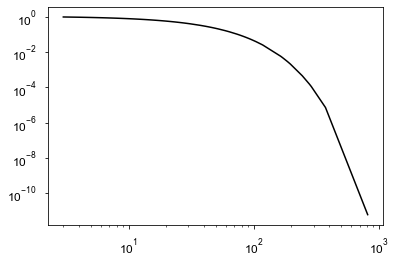

In [183]:
adam_ex = powerlaw.Fit(adamr_v, discrete = True, xmin = 3)
adam_ex.exponential.plot_ccdf( color = 'black')


In [118]:
ever_v = child_verbs_8['Eve'].dropna()
eve_fit = powerlaw.Fit(ever_v, discrete = True)
eve_fit.distribution_compare('power_law','lognormal')

Calculating best minimal value for power law fit
/Users/Ershui13/opt/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


(-4.734946584747999, 0.0018461336036979903)

In [369]:
sa = adam_fit.alpha
tn = 0
for i in range(1,len(adamr_v)+1):
    tn += i**(-sa+1)
print(tn)

21.385181168806376


In [390]:
sa

1.6163284978094696

In [380]:
for i in range(1,len(adamr_v)+1):
    tnn = i**(-sa)
    print(tnn)

1.0
0.3261644616892086
0.16936174474513535
0.10638325606901121
0.07417112441915544
0.05523978230554222
0.04305701858365567
0.03469843744849427
0.028683400583116383
0.024191984869057145
0.020738021747110702
0.018017253859516247
0.01583075452621653
0.0140436692882803
0.012561751041336678
0.011317397171844809
0.010261015491350578
0.009355505910608086
0.00857263065909272
0.007890565722009503
0.00729221179085164
0.006764005699645463
0.0062950689656454985
0.005876587906206932
0.005501355697601835
0.0051634295281774165
0.004857870767980223
0.004580545833553214
0.004327971984409257
0.004097196766271433
0.0038857029200674562
0.003691332756277734
0.003512227545653229
0.0033467785941209915
0.003193587482486212
0.0030514335491636955
0.002919247137825382
0.0027960874641833828
0.00268112420719198
0.0025736221211425507
0.0024729281118238723
0.002378460333286825
0.002289698949954911
0.002206178277887601
0.002127480073414801
0.002053227780476207
0.0019830815823531213
0.0019167341309972974
0.00185390684

In [385]:
list(range(1,len(adamr_v)+1))

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

In [488]:
bin_edges, probability = adam_fit.pdf()
print(bin_edges, probability)

[  3.   4.   6.   7.   9.  12.  15.  19.  24.  30.  39.  49.  62.  78.
  99. 125. 158. 200. 253. 319. 403. 509. 643. 813.] [1.64102564e-01 7.69230769e-02 5.64102564e-02 4.35897436e-02
 3.58974359e-02 1.19658120e-02 1.28205128e-02 1.43589744e-02
 9.40170940e-03 2.27920228e-03 3.58974359e-03 1.57790927e-03
 1.92307692e-03 1.46520147e-03 7.88954635e-04 0.00000000e+00
 7.32600733e-04 9.67585873e-05 1.55400155e-04 6.10500611e-05
 0.00000000e+00 0.00000000e+00 3.01659125e-05]


In [491]:
def alpha(vb, irvb):
    dat1 = pd.read_csv(vb)['count']
    dat2 = pd.read_csv(irvb)['count']
    fit1 = powerlaw.Fit(dat1, discrete = True, xmin =1)
    s1 = fit1.alpha
    tn = 0
    for i in range(1,len(dat1)+1):
        tn +=i**(-s) * i
    fit2 = powerlaw.Fit(dat2, discrete = True, xmin =1)
    s2 = fit2.alpha
    tr = 0
    for i in range(1,len(dat2)+1):
        tr +=i**(-s) * i
    trr = tr + (1-len(dat2)/len(dat1))*len(dat2)
    kk = [s1, s2, tn, trr]
    return kk

In [502]:
def alphamin(vb, irvb):
    dat1 = pd.read_csv(vb)['count']
    dat2 = pd.read_csv(irvb)['count']
    fit1 = powerlaw.Fit(dat1, discrete = True)
    s1 = fit1.alpha
    m1m = int(fit1.xmin)
    tn = 0
    for i in range(m1m,len(dat1)+1):
        tn +=i**(-s) * i
    fit2 = powerlaw.Fit(dat2, discrete = True)
    s2 = fit2.alpha
    m2m = int(fit2.xmin)
    tr = 0
    for i in range(m2m,len(dat2)+1):
        tr +=i**(-s) * i
    trr = tr + (1-len(dat2)/len(dat1))*len(dat2)
    kk = [s1, m1m, s2, m2m, tn, trr]
    return kk

In [492]:
vbls = ['Adam.csv', 'Eve.csv', 'Sarah.csv', 'Peter.csv', 'Naomi.csv', 'Allison.csv', 'April.csv', 'Fraser.csv']
vbrls = ['Adamir.csv', 'Eveir.csv', 'Sarahir.csv', 'Peterir.csv', 'Naomiir.csv', 'Allisonir.csv', 'Aprilir.csv', 'Fraserir.csv']
mvbls = ['Adam_mot.csv', 'Eve_mot.csv', 'Sarah_mot.csv', 'Peter_mot.csv', 'Naomi_mot.csv', 'Allison_mot.csv', 'April_mot.csv', 'Fraser_mot.csv']
mvbrls = ['Adamirmot.csv', 'Eveirmot.csv', 'Sarahirmot.csv', 'Peterirmot.csv', 'Naomiirmot.csv', 'Allisonirmot.csv', 'Aprilirmot.csv', 'Fraserirmot.csv']

In [493]:
pxls = []
for a, b in zip(vbls,vbrls):
    pxls.append(alpha(a,b))
for a,b in zip(mvbls, mvbrls):
    pxls.append(alpha(a,b))
pxls

[(1.419153216905472,
  1.2636740800818627,
  17.310801995320624,
  60.02920871760636),
 (1.5771768666144452,
  1.4670650562102494,
  10.949409358075547,
  30.298004839720992),
 (1.5450117673328028,
  1.3617869412066184,
  14.435195508825128,
  46.84711197219849),
 (1.4656315350374618, 1.3067585817804472, 19.5309647507736, 66.00563939049573),
 (1.5052650986815244, 1.37404763689067, 12.419555142265223, 36.11708559071938),
 (1.5093536102287446,
  1.4397843656290754,
  10.710388832534889,
  29.36875264030751),
 (1.7605790912318398,
  1.5872706707942084,
  8.500413999255663,
  18.489803675943662),
 (1.4188853451571162,
  1.2649192443048014,
  18.593291016707276,
  68.5697651055051),
 (1.4643487536453605,
  1.2893550195437686,
  17.119163646805585,
  63.84915723519147),
 (1.4659903996170618,
  1.3620839225593568,
  12.788806426456148,
  41.64706108122189),
 (1.5073913244579378,
  1.3275077309547754,
  17.03273546134419,
  64.18536010243506),
 (1.480148738840684, 1.254329616337034, 22.6035011

In [503]:
pxlsmin = []
for a, b in zip(vbls,vbrls):
    pxlsmin.append(alphamin(a,b))
for a,b in zip(mvbls, mvbrls):
    pxlsmin.append(alphamin(a,b))
pxlsmin

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best min

[[1.6163284978094696,
  3,
  1.6803518087707299,
  13,
  15.684079860260628,
  55.555518463639174],
 [1.5771768666144452,
  1,
  1.4670650562102494,
  1,
  10.949409358075547,
  30.298004839720992],
 [1.5450117673328028,
  1,
  2.4581905276106952,
  20,
  14.435195508825128,
  41.283744727228814],
 [1.4656315350374618,
  1,
  1.6826864955023466,
  15,
  19.5309647507736,
  61.185686226459524],
 [1.5052650986815244,
  1,
  3.0235378996302202,
  24,
  12.419555142265223,
  30.04728191477572],
 [2.2450825212134866,
  5,
  2.0497874879334086,
  5,
  8.214047316024526,
  26.872411123797146],
 [3.611104315322144,
  5,
  3.611104315322144,
  5,
  6.004072482745301,
  15.993462159433298],
 [1.9232345803934665,
  26,
  1.5865933928476532,
  14,
  12.291912037038188,
  63.91861978845985],
 [1.4643487536453605,
  1,
  1.7772222781734972,
  9,
  17.119163646805585,
  60.2005286773815],
 [1.4659903996170618,
  1,
  2.0186378459837573,
  14,
  12.788806426456148,
  36.995915764176644],
 [1.507391324

In [494]:
pd.DataFrame(pxls).to_csv('p(x)powerlaw.csv')

In [505]:
pd.DataFrame(pxlsmin).to_csv('p(x)minpowerlaw.csv')

In [478]:
adam_irv = data['Adam_ir'].dropna()
f_i = powerlaw.Fit(adam_irv, discrete = True)
sair = f_i.alpha
tr = 0
for i in range(1, len(adam_irv)+1):
    tr += i**(-sair + 1)
print(tr)

8.713937832935883


Calculating best minimal value for power law fit


In [372]:
trr = tr + (1-len(adam_irv)/len(adamr_v))*len(adam_irv)
trr

58.15184632966791

In [365]:
len(adamr_v)

306

In [195]:
adam_min_fit = powerlaw.Fit(adamr_v, discrete = True, xmax = 100, xmin = 3)

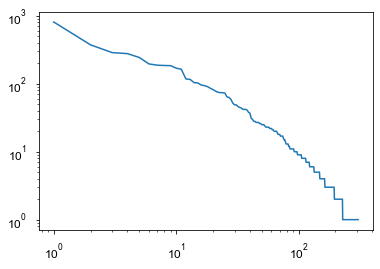

In [392]:
axdam = list(range(1,len(adamr_v)+1))
aydam = adamr_v
plt.figure()
plt.loglog(axdam, aydam)

[]

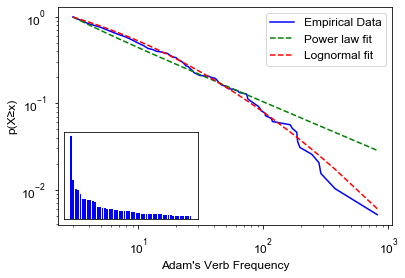

In [197]:
adam4 = adam_fit.plot_ccdf(color = 'b', label = "Empirical Data")
adam_fit.power_law.plot_ccdf(color = 'g', linestyle = '--', ax = adam4,label='Power law fit')
adam_fit.lognormal.plot_ccdf(ax = adam4, color = 'r', linestyle = '--', label='Lognormal fit' )
#adam_min_fit.exponential.plot_ccdf(ax = adam4, color = 'm', linestyle = '--', label = 'Exponential')
adam4.set_ylabel("p(X≥x)")
adam4.set_xlabel("Adam's Verb Frequency")
handles, labels = adam4.get_legend_handles_labels()
adam4.legend(handles, labels, loc = 1)
from mpl_toolkits.axes_grid.inset_locator import inset_axes
adam4in = inset_axes(adam4, width = "40%", height = "40%", loc=3)
#adam4in.hist(adamr_v, normed=False, color='b')
adam4in.bar(list(range(1,51)), adamr_v[:50],color="b")
adam4in.set_xticks([])
adam4in.set_yticks([])
#figname = 'adam2+1'
#plt.savefig(figname+'.tiff', bbox_inches = 'tight', dpi =300)

In [198]:
def plot(data, xname):
    fit = powerlaw.Fit(data, discrete = True, xmin = 1)
    ax1 = fit.plot_ccdf(color = 'b', label = "Empirical Data")
    #fit.exponential.plot_ccdf(color = 'm', linestyle = '--', ax = ax1, label = "Exponential")
    fit.power_law.plot_ccdf(color = 'g', linestyle = '--', ax = ax1,label='Power law')
    fit.lognormal.plot_ccdf(ax = ax1, color = 'r', linestyle = '--', label='Lognormal' )
    ax1.set_ylabel(u"p(X≥x)")
    ax1.set_xlabel(xname)
    handles, labels = ax1.get_legend_handles_labels()
    ax1.legend(handles, labels, loc = 1)
    ax1in = inset_axes(ax1, width = "40%", height = "40%", loc=3)
    ax1in.bar(list(range(1,51)), adamr_v[:50],color="b")
    ax1in.set_xticks([])
    ax1in.set_yticks([])

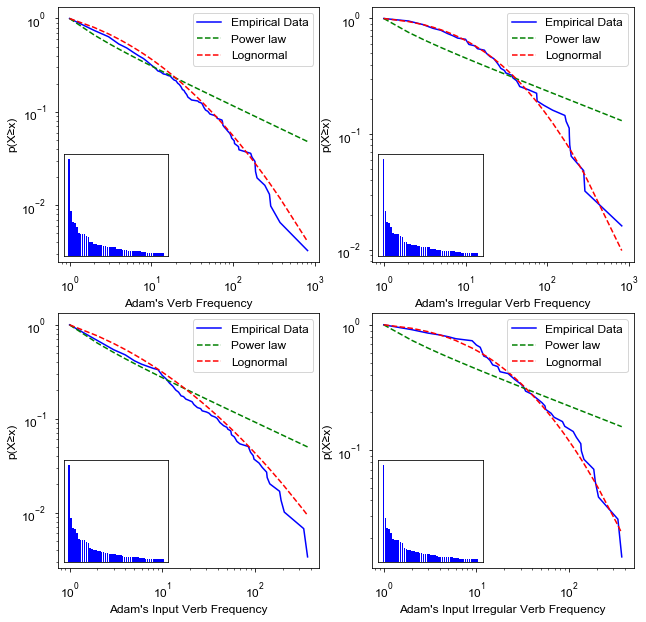

In [482]:
adam_v = pd.read_csv('Adam.csv')['count']
adami_v = pd.read_csv('Adamir.csv')['count']
adammotr_v = pd.read_csv('Adam_mot.csv')['count']
adammotir_v = pd.read_csv('Adamirmot.csv')['count']

plt.figure(figsize=(10,10))
plt.subplots_adjust(left=0.1, bottom=0.1, right=None, top=None, wspace=0.2, hspace=0.2)
plt.subplot(2,2,1)
plot(adamr_v,"Adam's Verb Frequency")
plt.subplot(2,2,2)
plot(adamir_v, "Adam's Irregular Verb Frequency")
plt.subplot(2,2,3)
plot(adammotr_v, "Adam's Input Verb Frequency")
plt.subplot(2,2,4)
plot(adammotir_v, "Adam's Input Irregular Verb Frequency")
figname = 'Adam4'
plt.savefig(figname+'.tiff', dpi =300)

In [480]:
ever_v = pd.read_csv('Eve.csv')['count']
eveir_v = pd.read_csv('Eveir.csv')['count']
evemotr_v = pd.read_csv('Eve_mot.csv')['count']
evemotir_v = pd.read_csv('Eveirmot.csv')['count']

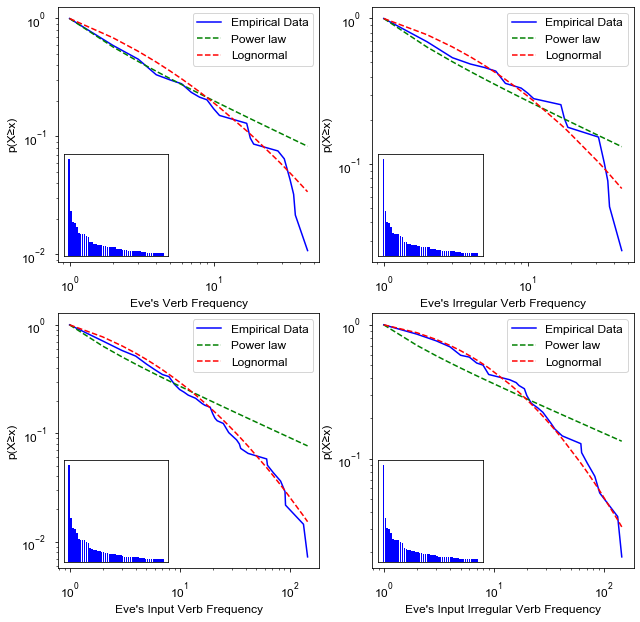

In [481]:
plt.figure(figsize=(10,10))
plt.subplots_adjust(left=0.1, bottom=0.1, right=None, top=None, wspace=0.2, hspace=0.2)
plt.subplot(2,2,1)
plot(ever_v,"Eve's Verb Frequency")
plt.subplot(2,2,2)
plot(eveir_v, "Eve's Irregular Verb Frequency")
plt.subplot(2,2,3)
plot(evemotr_v, "Eve's Input Verb Frequency")
plt.subplot(2,2,4)
plot(evemotir_v, "Eve's Input Irregular Verb Frequency")
figname = 'Eve4'
plt.savefig(figname+'.tiff', dpi =300)

In [483]:
fraserr_v = pd.read_csv('Fraser.csv')['count']
fraserir_v = pd.read_csv('Fraserir.csv')['count']
frasermotr_v = pd.read_csv('Fraser_mot.csv')['count']
frasermotir_v = pd.read_csv('Fraserirmot.csv')['count']

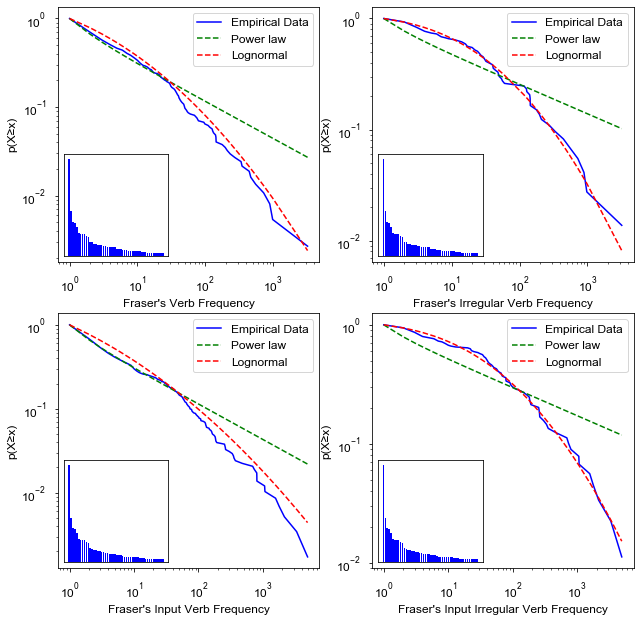

In [484]:
plt.figure(figsize=(10,10))
plt.subplots_adjust(left=0.1, bottom=0.1, right=None, top=None, wspace=0.2, hspace=0.2)
plt.subplot(2,2,1)
plot(fraserr_v,"Fraser's Verb Frequency")
plt.subplot(2,2,2)
plot(fraserir_v, "Fraser's Irregular Verb Frequency")
plt.subplot(2,2,3)
plot(frasermotr_v, "Fraser's Input Verb Frequency")
plt.subplot(2,2,4)
plot(frasermotir_v, "Fraser's Input Irregular Verb Frequency")
figname = 'Fraser4'
plt.savefig(figname+'.tiff', dpi =300)

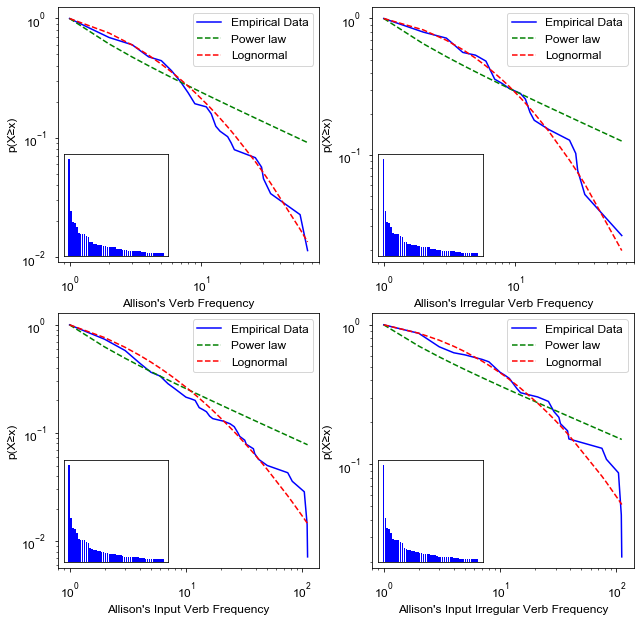

In [485]:
allisonr_v = pd.read_csv('Allison.csv')['count']
allisonir_v = pd.read_csv('Allisonir.csv')['count']
allisonmotr_v = pd.read_csv('Allison_mot.csv')['count']
allisonmotir_v = pd.read_csv('Allisonirmot.csv')['count']

plt.figure(figsize=(10,10))
plt.subplots_adjust(left=0.1, bottom=0.1, right=None, top=None, wspace=0.2, hspace=0.2)
plt.subplot(2,2,1)
plot(allisonr_v,"Allison's Verb Frequency")
plt.subplot(2,2,2)
plot(allisonir_v, "Allison's Irregular Verb Frequency")
plt.subplot(2,2,3)
plot(allisonmotr_v, "Allison's Input Verb Frequency")
plt.subplot(2,2,4)
plot(allisonmotir_v, "Allison's Input Irregular Verb Frequency")
figname = 'Allison4'
plt.savefig(figname+'.tiff', dpi =300)


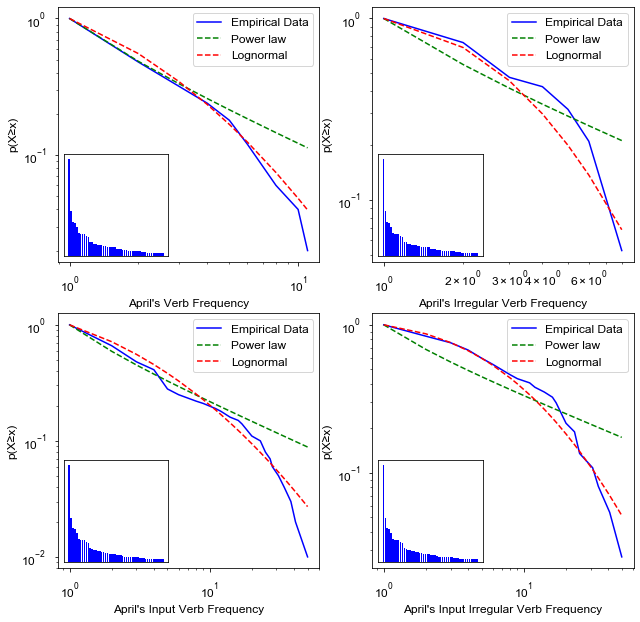

In [207]:
aprilr_v = pd.read_csv('April.csv')['count']
aprilir_v = pd.read_csv('Aprilir.csv')['count']
aprilmotr_v = pd.read_csv('April_mot.csv')['count']
aprilmotir_v = pd.read_csv('Aprilirmot.csv')['count']

plt.figure(figsize=(10,10))
plt.subplots_adjust(left=0.1, bottom=0.1, right=None, top=None, wspace=0.2, hspace=0.2)
plt.subplot(2,2,1)
plot(aprilr_v,"April's Verb Frequency")
plt.subplot(2,2,2)
plot(aprilir_v, "April's Irregular Verb Frequency")
plt.subplot(2,2,3)
plot(aprilmotr_v, "April's Input Verb Frequency")
plt.subplot(2,2,4)
plot(aprilmotir_v, "April's Input Irregular Verb Frequency")
figname = 'April4'
plt.savefig(figname+'.tiff', dpi =300)

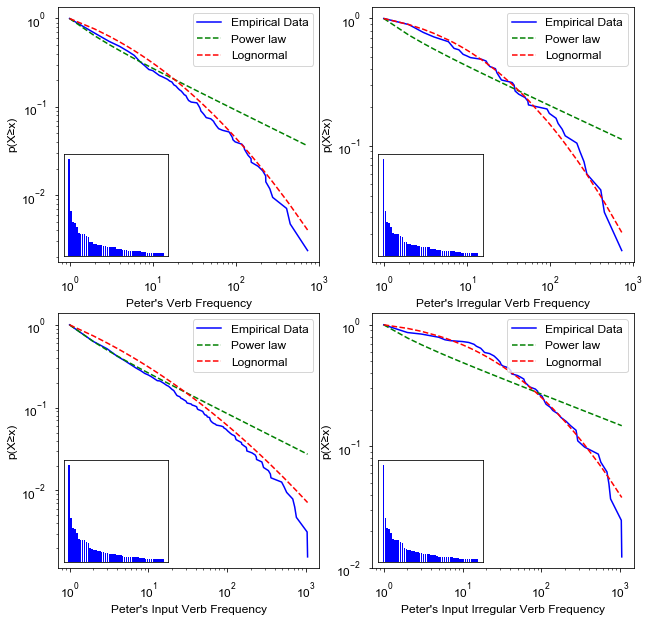

In [486]:
peterr_v = pd.read_csv('Peter.csv')['count']
peterir_v = pd.read_csv('Peterir.csv')['count']
petermotr_v = pd.read_csv('Peter_mot.csv')['count']
petermotir_v = pd.read_csv('Peterirmot.csv')['count']

plt.figure(figsize=(10,10))
plt.subplots_adjust(left=0.1, bottom=0.1, right=None, top=None, wspace=0.2, hspace=0.2)
plt.subplot(2,2,1)
plot(peterr_v,"Peter's Verb Frequency")
plt.subplot(2,2,2)
plot(peterir_v, "Peter's Irregular Verb Frequency")
plt.subplot(2,2,3)
plot(petermotr_v, "Peter's Input Verb Frequency")
plt.subplot(2,2,4)
plot(petermotir_v, "Peter's Input Irregular Verb Frequency")
figname = 'Peter4'
plt.savefig(figname+'.tiff', dpi =300)

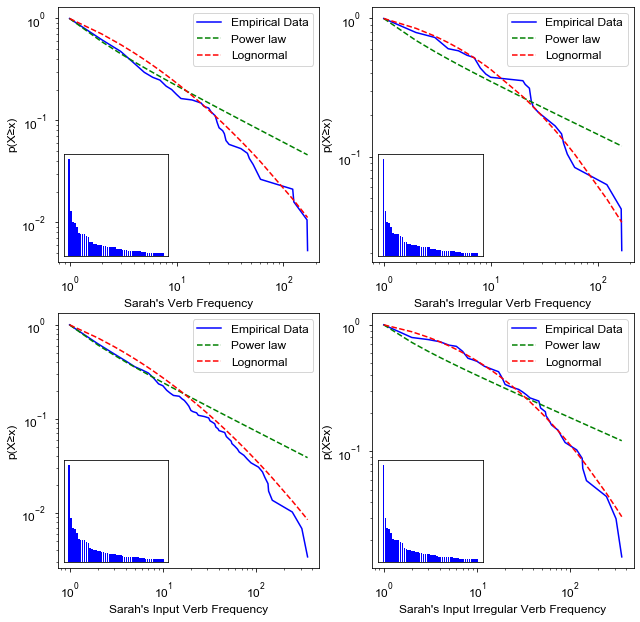

In [209]:
sarahr_v = pd.read_csv('Sarah.csv')['count']
sarahir_v = pd.read_csv('Sarahir.csv')['count']
sarahmotr_v = pd.read_csv('Sarah_mot.csv')['count']
sarahmotir_v = pd.read_csv('Sarahirmot.csv')['count']

plt.figure(figsize=(10,10))
plt.subplots_adjust(left=0.1, bottom=0.1, right=None, top=None, wspace=0.2, hspace=0.2)
plt.subplot(2,2,1)
plot(sarahr_v,"Sarah's Verb Frequency")
plt.subplot(2,2,2)
plot(sarahir_v, "Sarah's Irregular Verb Frequency")
plt.subplot(2,2,3)
plot(sarahmotr_v, "Sarah's Input Verb Frequency")
plt.subplot(2,2,4)
plot(sarahmotir_v, "Sarah's Input Irregular Verb Frequency")
figname = 'Sarah4'
plt.savefig(figname+'.tiff', dpi =300)



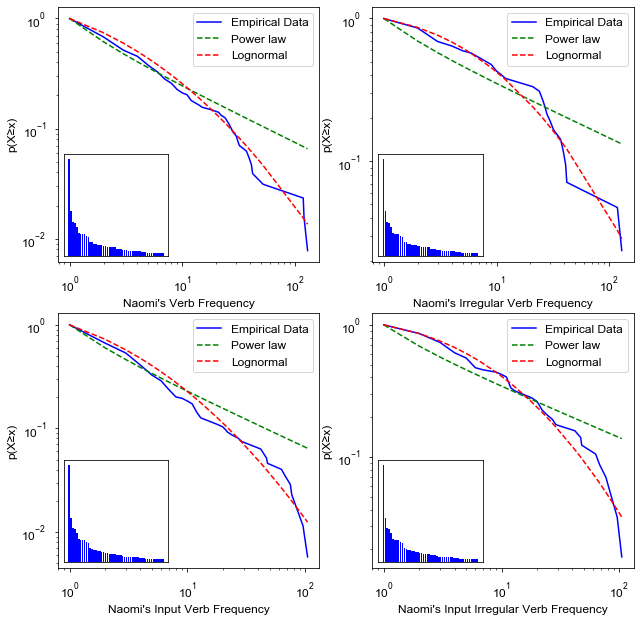

In [487]:
naomir_v = pd.read_csv('Naomi.csv')['count']
naomiir_v = pd.read_csv('Naomiir.csv')['count']
naomimotr_v = pd.read_csv('Naomi_mot.csv')['count']
naomimotir_v = pd.read_csv('Naomiirmot.csv')['count']

plt.figure(figsize=(10,10))
plt.subplots_adjust(left=0.1, bottom=0.1, right=None, top=None, wspace=0.2, hspace=0.2)
plt.subplot(2,2,1)
plot(naomir_v,"Naomi's Verb Frequency")
plt.subplot(2,2,2)
plot(naomiir_v, "Naomi's Irregular Verb Frequency")
plt.subplot(2,2,3)
plot(naomimotr_v, "Naomi's Input Verb Frequency")
plt.subplot(2,2,4)
plot(naomimotir_v, "Naomi's Input Irregular Verb Frequency")
figname = 'Naomi4'
plt.savefig(figname+'.tiff', dpi =300)

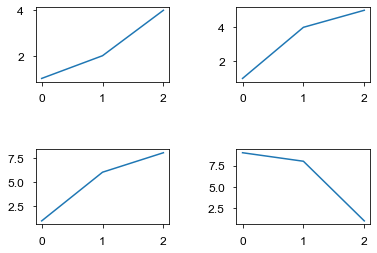

In [160]:
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.9)
plt.subplot(2,2,1)
plt.plot([1,2,4])
plt.subplot(2,2,2)
plt.plot([1,4,5])
plt.subplot(2,2,3)
plt.plot([1,6,8])
plt.subplot(2,2,4)
plt.plot([9,8,1])
